# Explanatory Data Analysis and Feature Selection for Bayesian Networks

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

Define functions

In [3]:
def preprocess_data(data):
    """
    Process raw data from a dictionary to a formatted DataFrame.
    
    Parameters:
    - data (dict): A dictionary where the key is an IP address and the value is another dictionary
      of statistics indexed by bin number.

    Returns:
    - pd.DataFrame: A DataFrame with rows for each statistic, including IP and bin index, and
      columns reordered excluding the first and last bin index (drop bin number larger than 18 if there are more than 20 bins).
    """
    rows = []
    for ip, stats in data.items():
        for index, values in stats.items():
            # # Exclude bins with index 0 or index > 18
            # if index == 0 or index > 18:
            #     continue
            values['IP'] = ip
            values['bin_index'] = index
            rows.append(values)
    
    # Create the DataFrame
    df = pd.DataFrame(rows)

    # Reorder columns
    column_order = ['IP', 'bin_index'] + [col for col in df.columns if col not in ['IP', 'bin_index']]
    df = df[column_order]

    # Reset index after filtering
    df = df.reset_index(drop=True)
    
    return df


def load_and_preprocess(file_path):
    """
    Load data from a pickle file and preprocess it.
    
    Parameters:
    - file_path (str): The file path to the pickle file containing data processed by preprocessing_bins.py
    
    Returns:
    - pd.DataFrame: A preprocessed DataFrame ready for further analysis or processing.
    """
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return preprocess_data(data)

## 1. Load Data

Segment the dataset into smaller bins (10 seconds).

In [4]:
df_3 = load_and_preprocess('../data/pickle_files/hdumb_3_false_bins1.pkl')
df_3.head()

IP  bin_index  total_bytes_incoming  total_bytes_outgoing  \
0  10.0.1.1          0                105336                 42151   
1  10.0.1.1          1                 86779                 39866   
2  10.0.1.1          2                 79904                 39474   
3  10.0.1.1          3                 70648                 38976   
4  10.0.1.1          4                 40509                 51054   

   incoming_packets  outgoing_packets  sum_inter_arrival_incoming  \
0              1084               511                    9.966632   
1               943               532                    9.998707   
2               834               529                    9.999061   
3               704               535                   10.003702   
4               457               531                    9.991360   

   count_inter_arrival_incoming  sum_inter_arrival_outgoing  \
0                          1083                    9.960501   
1                           943                   10.012674   
2                           834                    9.985281   
3                           704                   10.011403   
4                           457                   10.001567   

   count_inter_arrival_outgoing  average_incoming_bytes  std_incoming_bytes  \
0                           510               97.173432           28.388275   
1                           532               92.024390           26.879112   
2                           529               95.808153           28.227835   
3                           535              100.352273           29.309275   
4                           531               88.641138           30.115973   

   median_incoming_bytes  packet_frequency_incoming  \
0                   96.0                      108.4   
1                   79.0                       94.3   
2                   99.0                       83.4   
3                  113.0                       70.4   
4                   82.0                       45.7   

   average_inter_arrival_incoming  average_outgoing_bytes  std_outgoing_bytes  \
0                        0.009203               82.487280           24.856437   
1                        0.010603               74.936090            8.767538   
2                        0.011989               74.620038            8.419250   
3                        0.014210               72.852336           21.458231   
4                        0.021863               96.146893           26.736822   

   median_outgoing_bytes  packet_frequency_outgoing  \
0                   79.0                       51.1   
1                   75.0                       53.2   
2                   76.0                       52.9   
3                   72.0                       53.5   
4                   86.0                       53.1   

   average_inter_arrival_outgoing  
0                        0.019530  
1                        0.018821  
2                        0.018876  
3                        0.018713  
4                        0.018835

In [5]:
df_5 = load_and_preprocess('../data/pickle_files/hdumb_5_false_bins1.pkl')
df_5.head()

IP  bin_index  total_bytes_incoming  total_bytes_outgoing  \
0  10.0.1.1          0                152869                 54015   
1  10.0.1.1          1                109030                 59281   
2  10.0.1.1          2                118455                 60858   
3  10.0.1.1          3                 66670                 58393   
4  10.0.1.1          4                 58059                 59886   

   incoming_packets  outgoing_packets  sum_inter_arrival_incoming  \
0              1778               478                    8.844607   
1              1286               537                    9.967658   
2              1390               537                   10.011198   
3               820               534                   10.020594   
4               733               534                    9.985376   

   count_inter_arrival_incoming  sum_inter_arrival_outgoing  \
0                          1777                    8.850922   
1                          1286                    9.998009   
2                          1390                    9.999053   
3                           820                    9.997652   
4                           733                    9.995912   

   count_inter_arrival_outgoing  average_incoming_bytes  std_incoming_bytes  \
0                           477               85.978065           19.218498   
1                           537               84.782271           23.187361   
2                           537               85.219424           22.716776   
3                           534               81.304878           23.526925   
4                           534               79.207367           22.316602   

   median_incoming_bytes  packet_frequency_incoming  \
0                   83.0                      177.8   
1                   77.0                      128.6   
2                   77.0                      139.0   
3                   77.0                       82.0   
4                   77.0                       73.3   

   average_inter_arrival_incoming  average_outgoing_bytes  std_outgoing_bytes  \
0                        0.004977              113.002092           30.352195   
1                        0.007751              110.392924           24.108124   
2                        0.007202              113.329609           22.653649   
3                        0.012220              109.350187           24.522055   
4                        0.013623              112.146067           22.543958   

   median_outgoing_bytes  packet_frequency_outgoing  \
0                  120.0                       47.8   
1                  119.0                       53.7   
2                  121.0                       53.7   
3                  118.0                       53.4   
4                  120.0                       53.4   

   average_inter_arrival_outgoing  
0                        0.018555  
1                        0.018618  
2                        0.018620  
3                        0.018722  
4                        0.018719

In [6]:
df_8 = load_and_preprocess('../data/pickle_files/hdumb_8_false_bins1.pkl')
df_8.head()

IP  bin_index  total_bytes_incoming  total_bytes_outgoing  \
0  10.0.1.1          0                228454                 42899   
1  10.0.1.1          1                248011                 40339   
2  10.0.1.1          2                176902                 39041   
3  10.0.1.1          3                191286                 39524   
4  10.0.1.1          4                101134                 38918   

   incoming_packets  outgoing_packets  sum_inter_arrival_incoming  \
0              2563               492                    9.137494   
1              2782               544                   10.001760   
2              1902               540                    9.996716   
3              2120               540                   10.005140   
4              1033               547                    9.981451   

   count_inter_arrival_incoming  sum_inter_arrival_outgoing  \
0                          2562                    9.128691   
1                          2782                   10.015154   
2                          1902                   10.002473   
3                          2120                    9.992702   
4                          1033                    9.992957   

   count_inter_arrival_outgoing  average_incoming_bytes  std_incoming_bytes  \
0                           491               89.135388           20.779933   
1                           544               89.148454           23.370934   
2                           540               93.008412           25.808850   
3                           540               90.229245           25.566600   
4                           547               97.903195           29.143329   

   median_incoming_bytes  packet_frequency_incoming  \
0                   82.0                      256.3   
1                   78.0                      278.2   
2                   78.0                      190.2   
3                   77.0                      212.0   
4                  105.0                      103.3   

   average_inter_arrival_incoming  average_outgoing_bytes  std_outgoing_bytes  \
0                        0.003567               87.193089           26.957939   
1                        0.003595               74.152574            8.908408   
2                        0.005256               72.298148            8.252621   
3                        0.004719               73.192593            8.710769   
4                        0.009663               71.148080            8.890976   

   median_outgoing_bytes  packet_frequency_outgoing  \
0                   83.0                       49.2   
1                   76.0                       54.4   
2                   72.0                       54.0   
3                   72.0                       54.0   
4                   72.0                       54.7   

   average_inter_arrival_outgoing  
0                        0.018592  
1                        0.018410  
2                        0.018523  
3                        0.018505  
4                        0.018269

## 2. Label Data
For the Bayesian networks, we need to label each bin whether a target client is speaking.

### Client 3

Compute standard deviation of variables. If the standard deviation is low, it is less likely that it represents the client's speaking behavior. (Only look at outgoing traffic)

In [7]:
df_3.drop(['IP', 'bin_index'], axis=1).std()

total_bytes_incoming              20344.071654
total_bytes_outgoing               8755.791831
incoming_packets                    187.974842
outgoing_packets                     22.242443
sum_inter_arrival_incoming            0.428541
count_inter_arrival_incoming        187.866369
sum_inter_arrival_outgoing            0.426437
count_inter_arrival_outgoing         22.262304
average_incoming_bytes               11.954908
std_incoming_bytes                    6.448029
median_incoming_bytes                17.061974
packet_frequency_incoming            18.797484
average_inter_arrival_incoming        0.005701
average_outgoing_bytes               16.212178
std_outgoing_bytes                    7.901645
median_outgoing_bytes                19.966248
packet_frequency_outgoing             2.224244
average_inter_arrival_outgoing        0.000122
dtype: float64

**Observations**
- Interestingly, inter arrival times (outgoing) does not vary a lot. It seems like it stays consistent during the session.
- The number of outgoing packets also appears to be consistent and does not change depending on the client's speaking behavior.
- The candidates would be `average_outgoing_bytes`, `std_outgoin_bytes` and `median_outgoing_bytes`.

Visualize incoming and outgoing packet sizes for each client IP address without segmentation. Compare it with variables selected in the previous step.

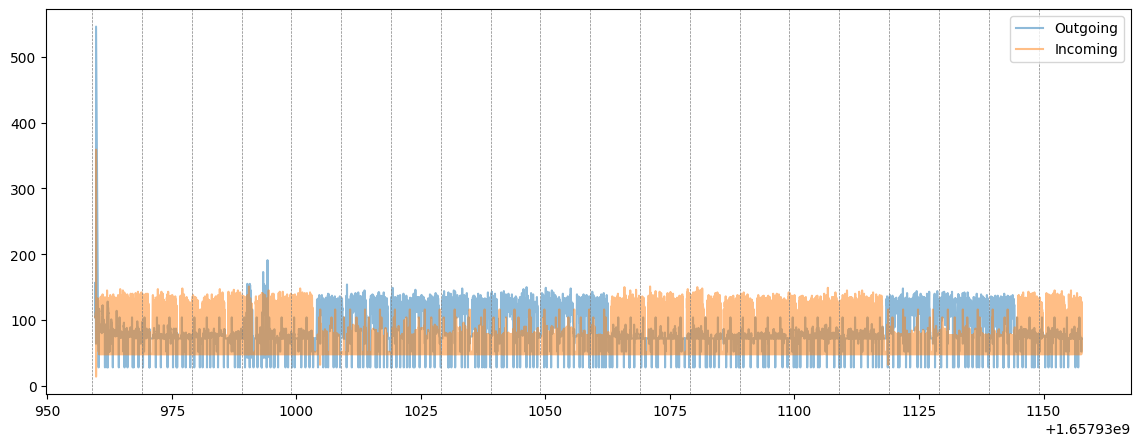

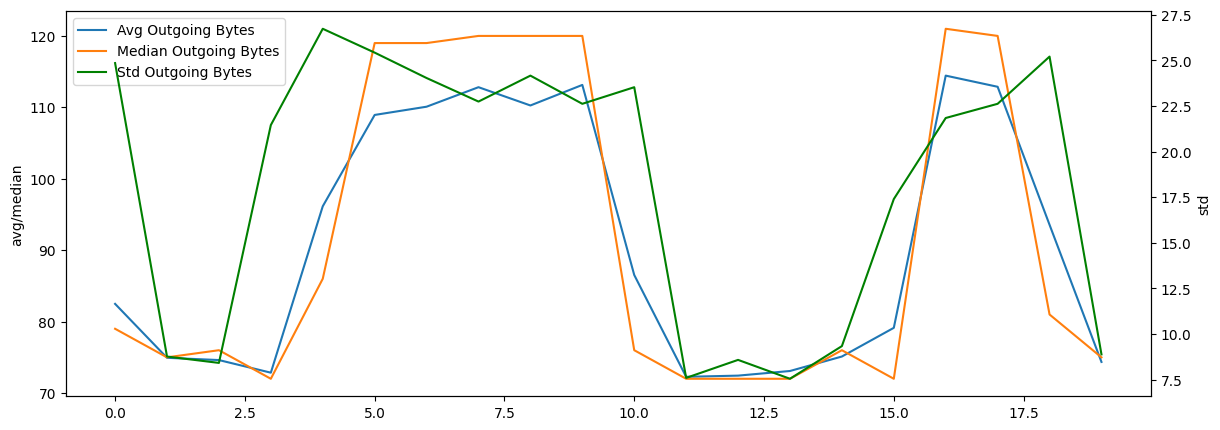

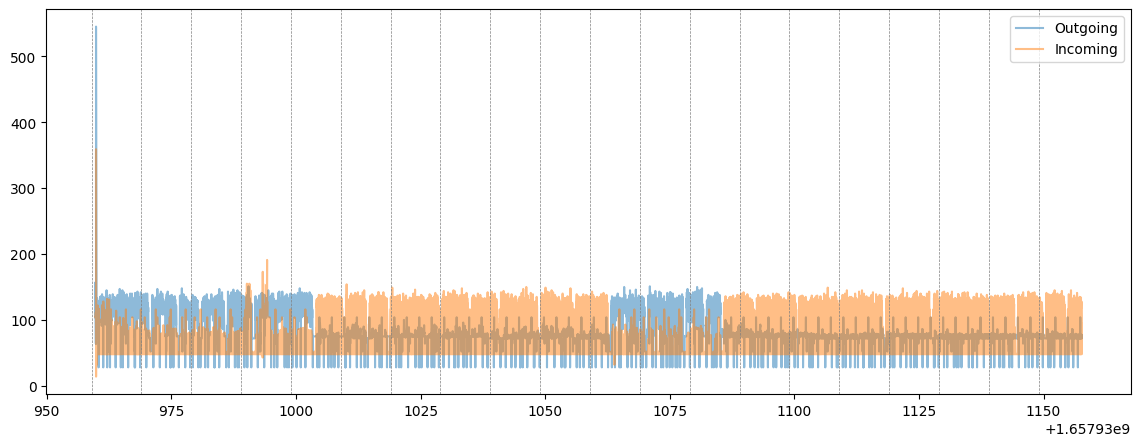

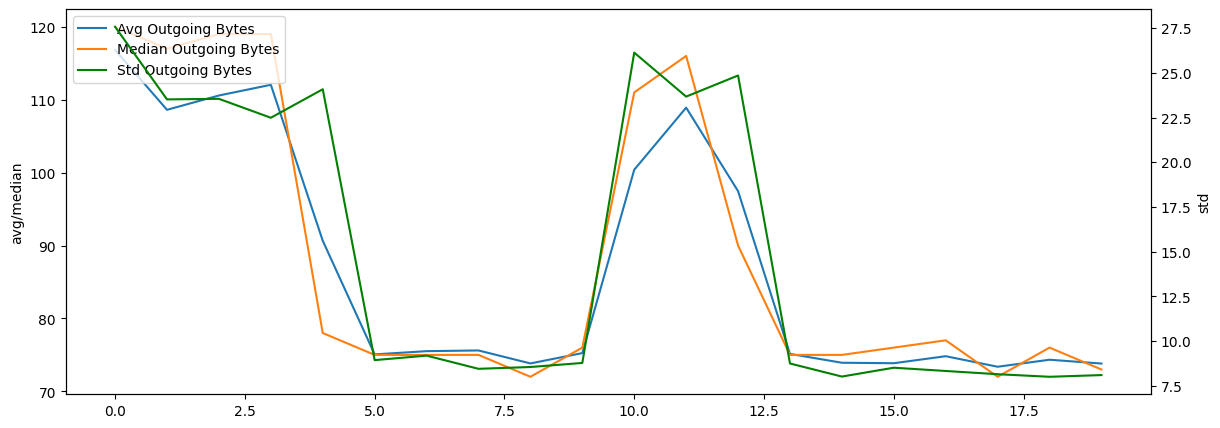

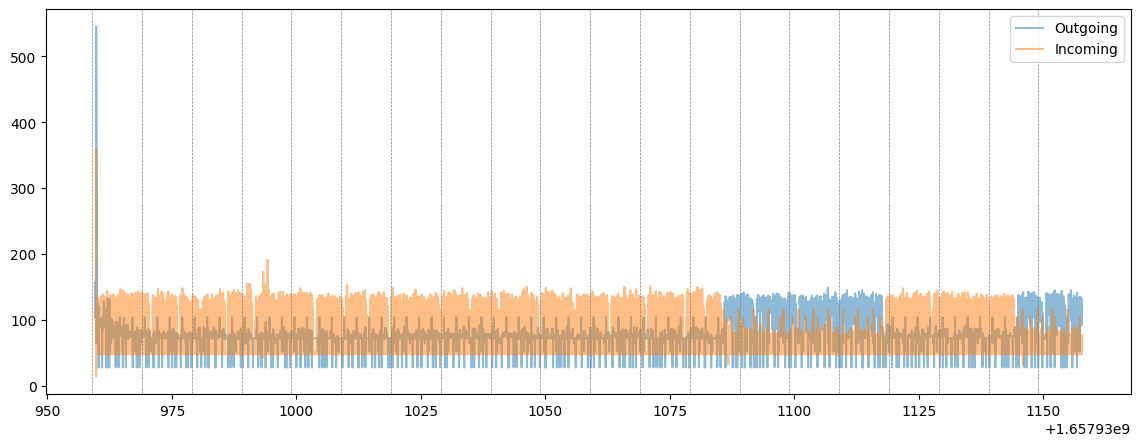

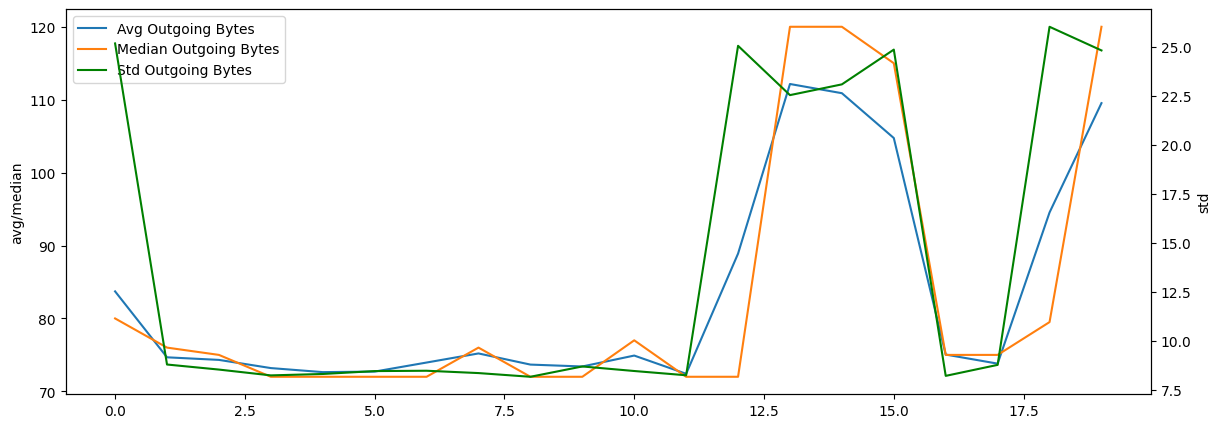

In [8]:
df_3_false = pd.read_csv('../data/csv_files/hdumb_3_false1.csv')

for i in range(3):
    df_3_false_out = df_3_false[df_3_false['src_ip'] == f'10.0.{i+1}.1']
    df_3_false_out = df_3_false_out.sort_values(by='timestamp')
    df_3_false_in = df_3_false[df_3_false['dst_ip'] == f'10.0.{i+1}.1']
    df_3_false_in = df_3_false_in.sort_values(by='timestamp')
    plt.figure(figsize=(14, 5))
    plt.plot(df_3_false_out['timestamp'], df_3_false_out['udp_payload_length'], alpha=0.5, label='Outgoing')
    plt.plot(df_3_false_in['timestamp'], df_3_false_in['udp_payload_length'], alpha=0.5, label='Incoming')

    # Add vertical lines every 10 seconds (bins)
    start_time = min(df_3_false_out['timestamp'].min(), df_3_false_in['timestamp'].min())
    end_time = max(df_3_false_out['timestamp'].max(), df_3_false_in['timestamp'].max())
    for t in range(int(start_time), int(end_time) + 1, 10):
        plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    
    plt.legend(fontsize='10')
    plt.show()

    df_filtered = df_3[df_3['IP'] == f'10.0.{i+1}.1']

    plt.figure(figsize=(14, 5))
    ax1 = plt.gca()  # Get current axis
    ax1.plot(df_filtered['bin_index'], df_filtered['average_outgoing_bytes'], label='Avg Outgoing Bytes')
    ax1.plot(df_filtered['bin_index'], df_filtered['median_outgoing_bytes'], label='Median Outgoing Bytes')
    ax1.set_ylabel('avg/median')
    
    # Create the second axis
    ax2 = ax1.twinx()
    ax2.plot(df_filtered['bin_index'], df_filtered['std_outgoing_bytes'], 'g', label='Std Outgoing Bytes')
    ax2.set_ylabel('std')
    
    # To make the plot easier to read, you might want to change the color of the tick labels to match the line color
    ax2.tick_params(axis='y')
    
    # Adding legends. The tricky part is combining the legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    plt.show()

**Observations**
- Standard deviations seem to capture the chage in client behavior the best and the threshold can be set to 20.
- We can define `is_speaking` if the standard deviation is greater than equal to 20.

### Client 5 & 8

Check if the rule defined above stays consistent for 5 and 8 clietns

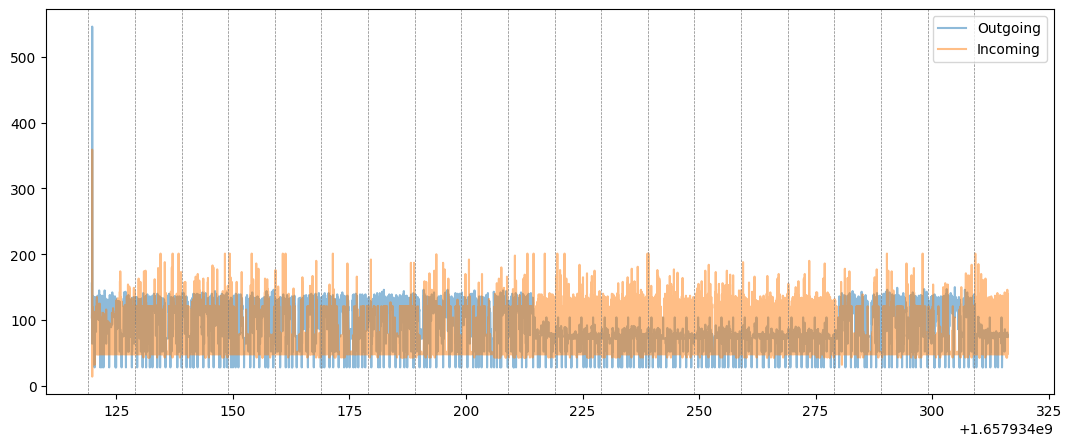

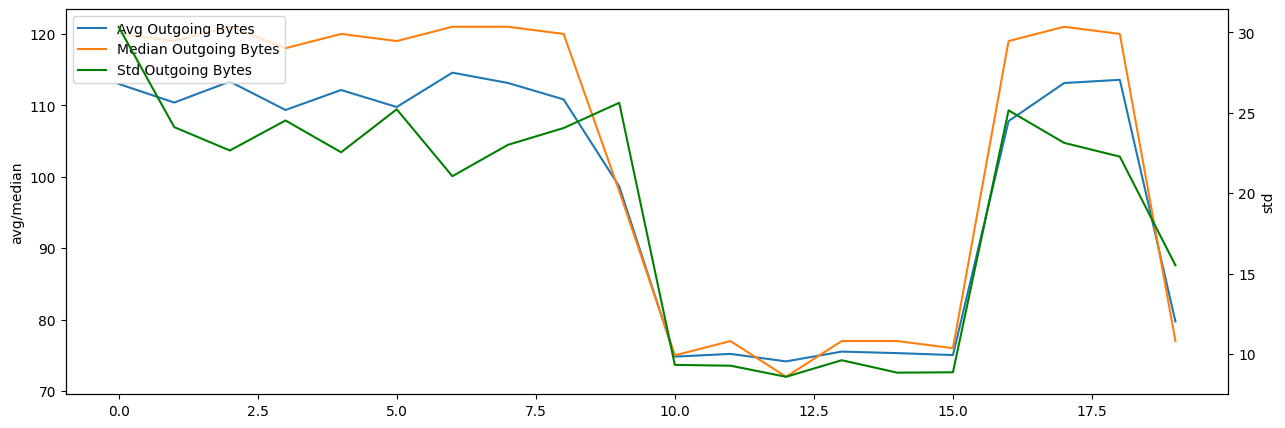

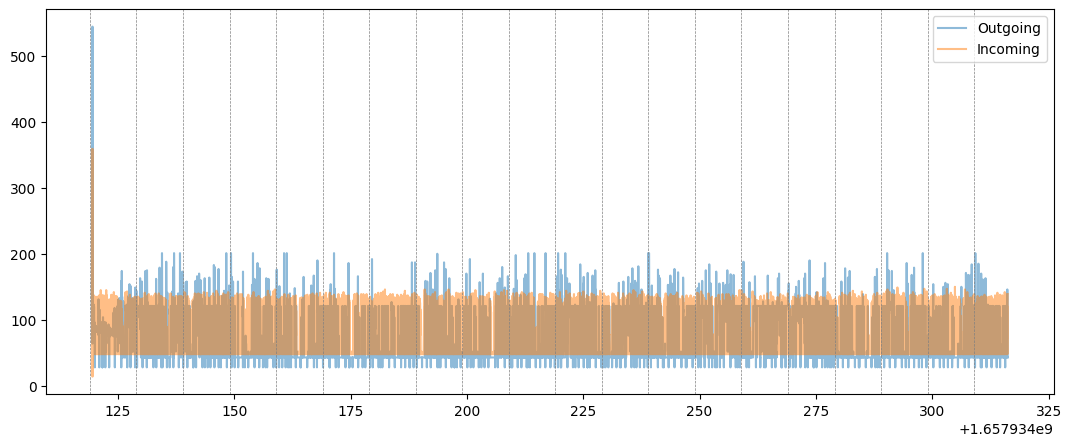

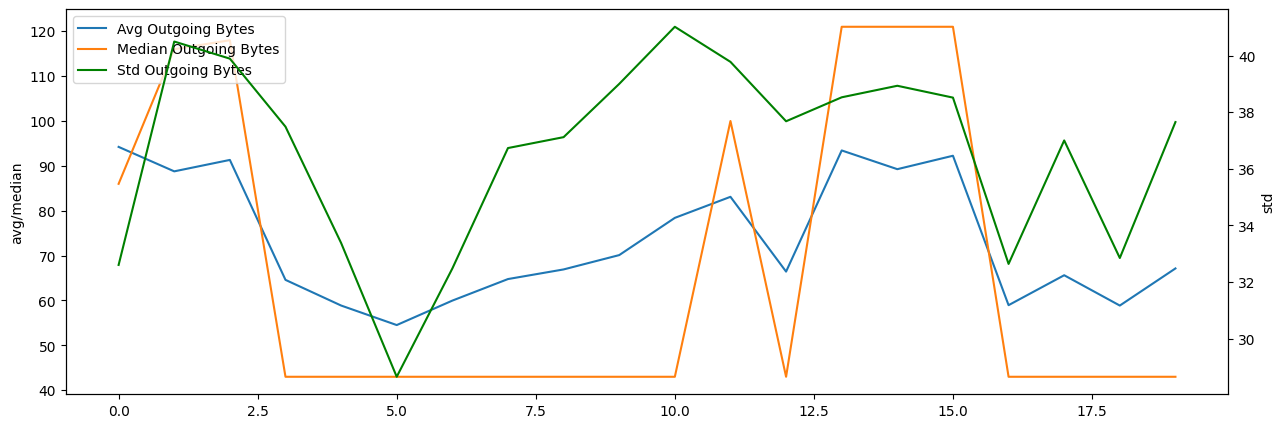

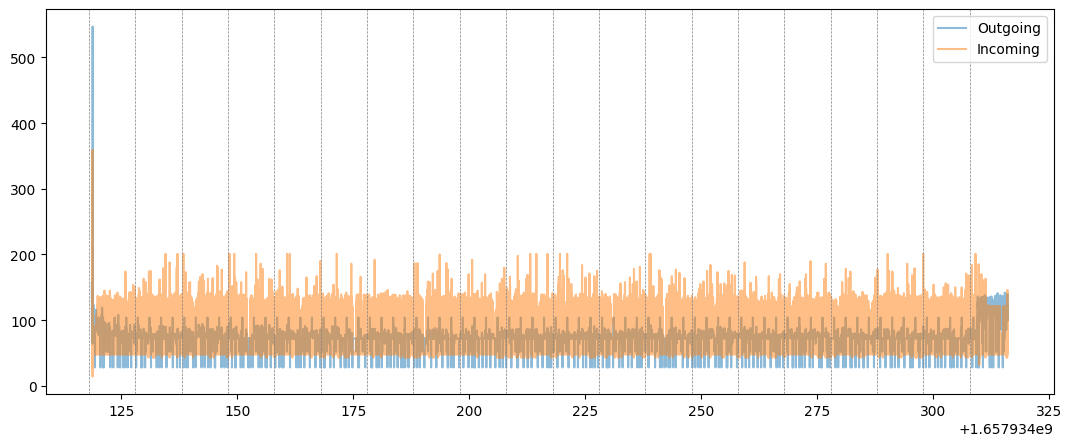

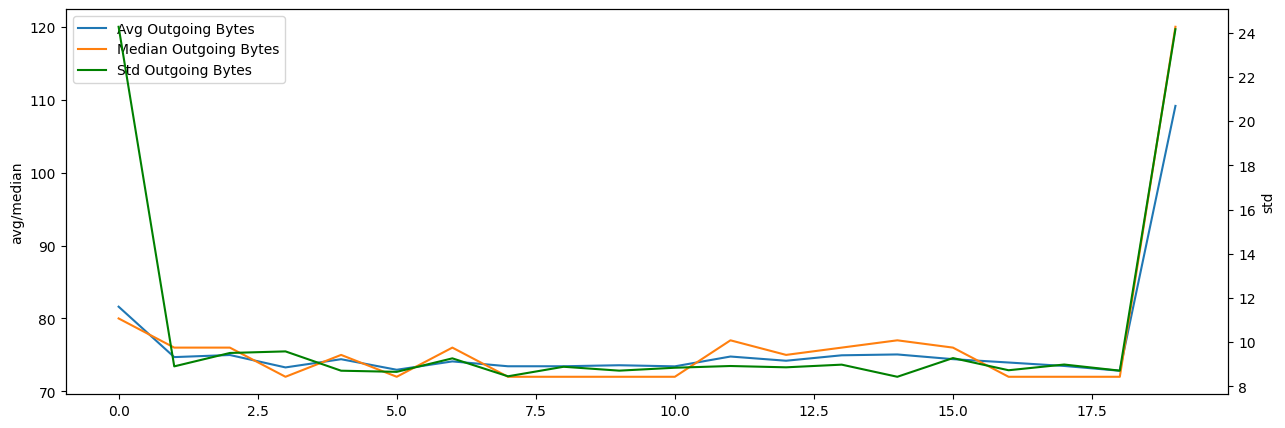

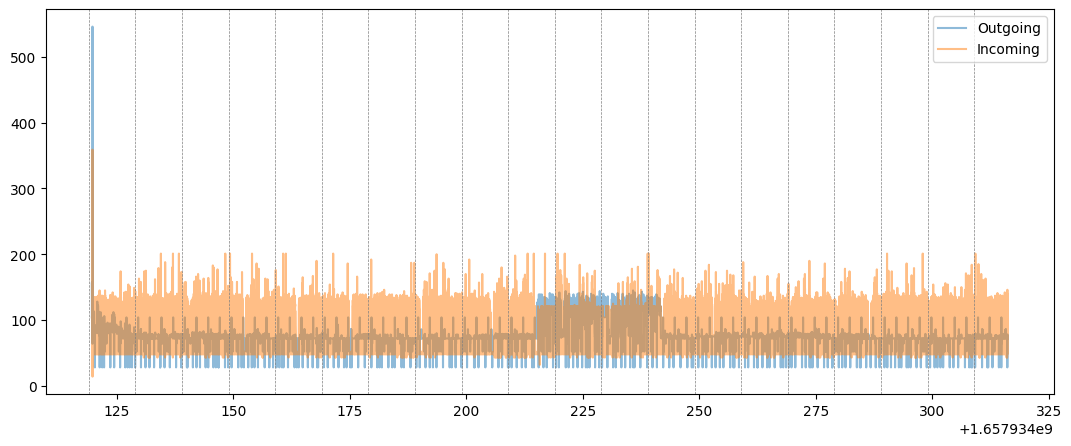

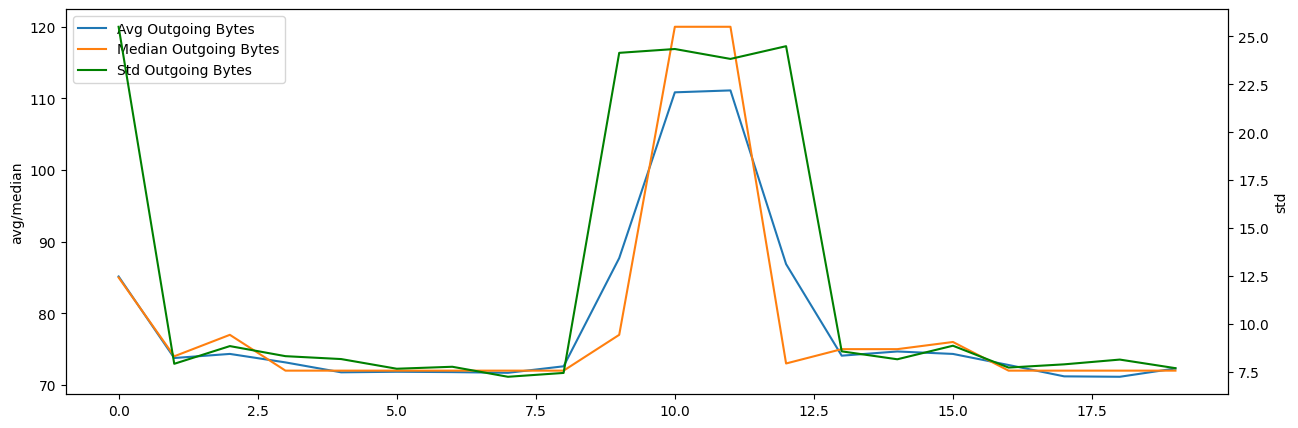

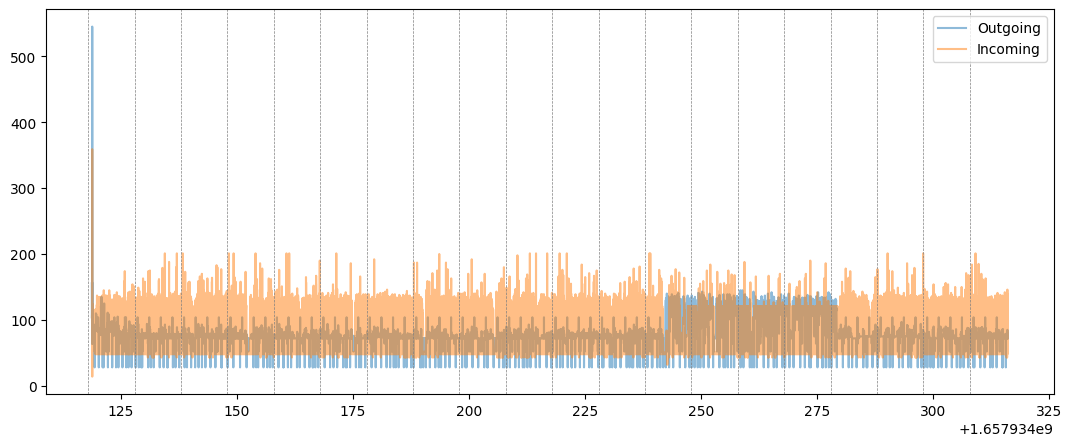

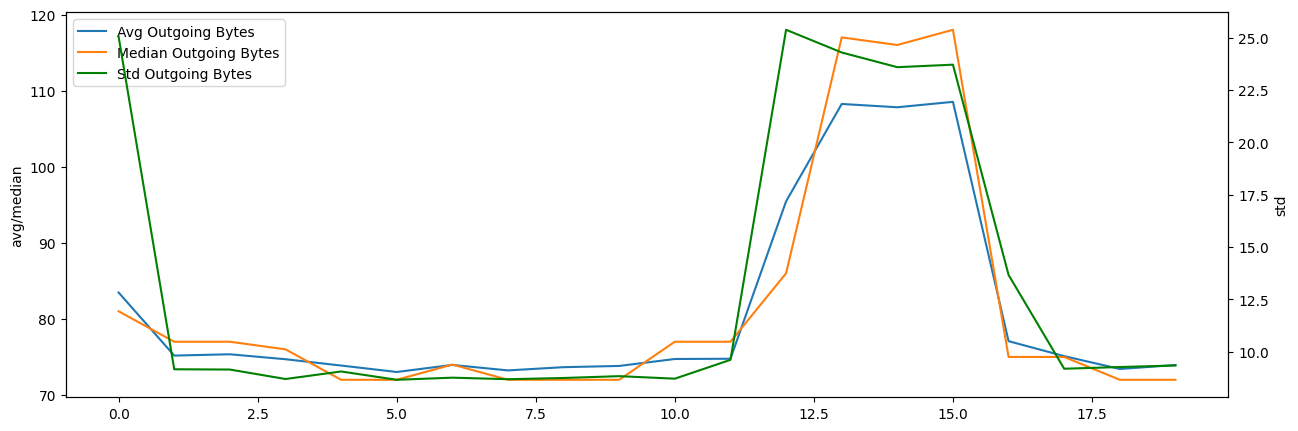

In [9]:
df_5_false = pd.read_csv('../data/csv_files/hdumb_5_false1.csv')

for i in range(5):
    df_5_false_out = df_5_false[df_5_false['src_ip'] == f'10.0.{i+1}.1']
    df_5_false_out = df_5_false_out.sort_values(by='timestamp')
    df_5_false_in = df_5_false[df_5_false['dst_ip'] == f'10.0.{i+1}.1']
    df_5_false_in = df_5_false_in.sort_values(by='timestamp')
    plt.figure(figsize=(13, 5))
    plt.plot(df_5_false_out['timestamp'], df_5_false_out['udp_payload_length'], alpha=0.5, label='Outgoing')
    plt.plot(df_5_false_in['timestamp'], df_5_false_in['udp_payload_length'], alpha=0.5, label='Incoming')

    # Add vertical lines every 10 seconds (bins)
    start_time = min(df_5_false_out['timestamp'].min(), df_5_false_in['timestamp'].min())
    end_time = max(df_5_false_out['timestamp'].max(), df_5_false_in['timestamp'].max())
    for t in range(int(start_time), int(end_time) + 1, 10):
        plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    
    plt.legend(fontsize='10')
    plt.show()

    df_filtered = df_5[df_5['IP'] == f'10.0.{i+1}.1']

    plt.figure(figsize=(15, 5))
    ax1 = plt.gca()  # Get current axis
    ax1.plot(df_filtered['bin_index'], df_filtered['average_outgoing_bytes'], label='Avg Outgoing Bytes')
    ax1.plot(df_filtered['bin_index'], df_filtered['median_outgoing_bytes'], label='Median Outgoing Bytes')
    ax1.set_ylabel('avg/median')
    
    # Create the second axis
    ax2 = ax1.twinx()
    ax2.plot(df_filtered['bin_index'], df_filtered['std_outgoing_bytes'], 'g', label='Std Outgoing Bytes')
    ax2.set_ylabel('std')
    
    # To make the plot easier to read, you might want to change the color of the tick labels to match the line color
    ax2.tick_params(axis='y')
    
    # Adding legends. The tricky part is combining the legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    plt.show()

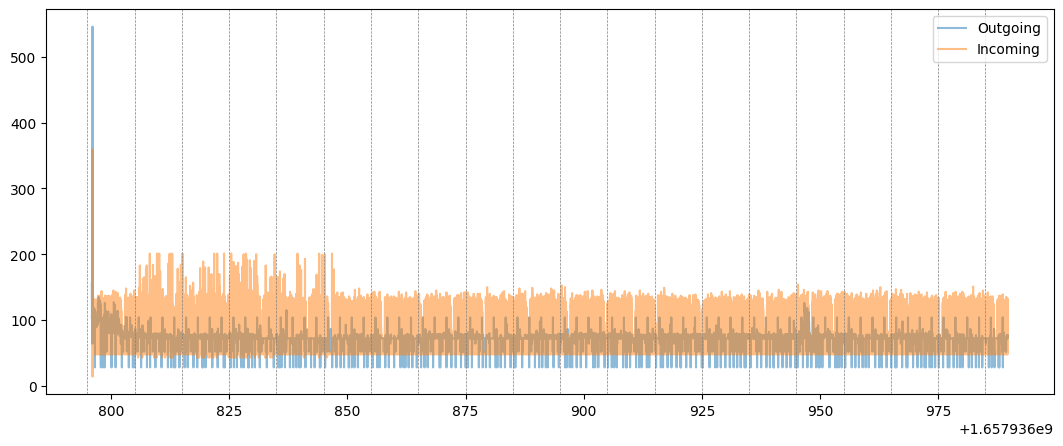

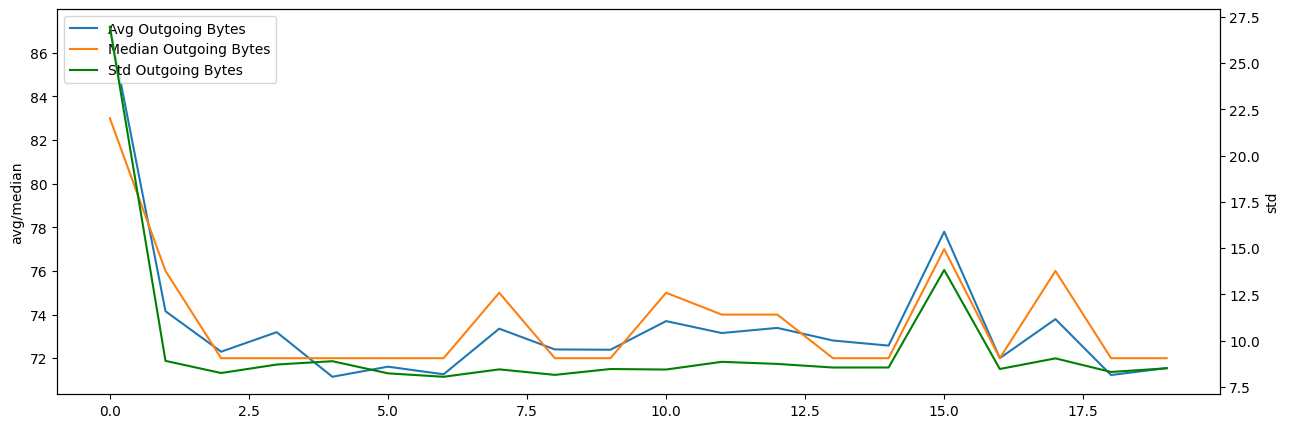

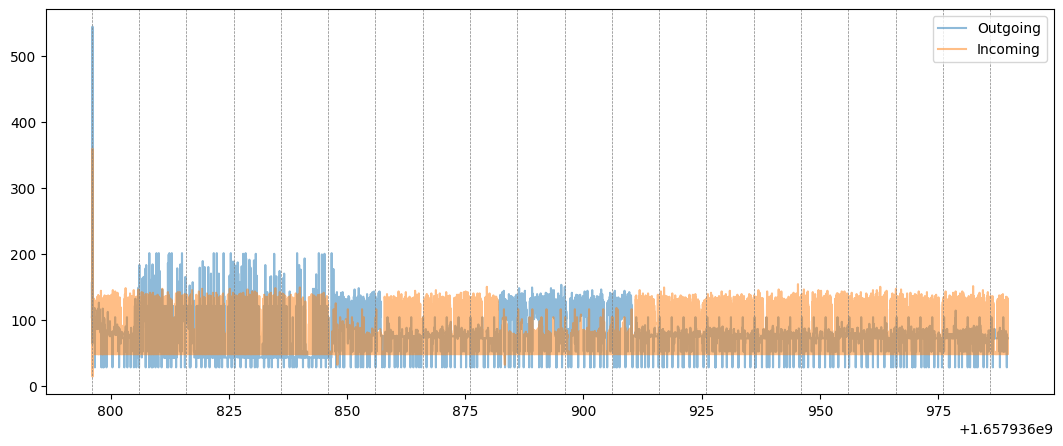

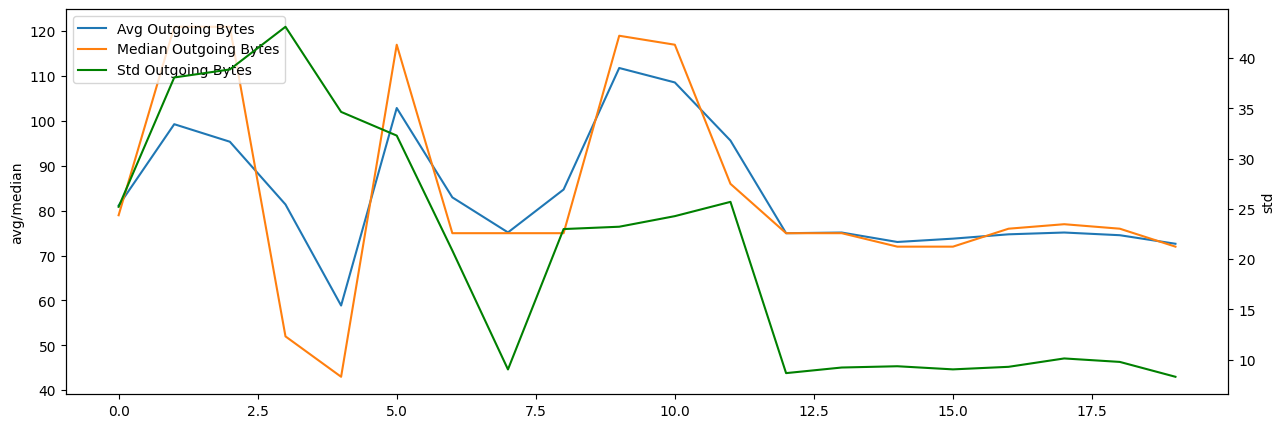

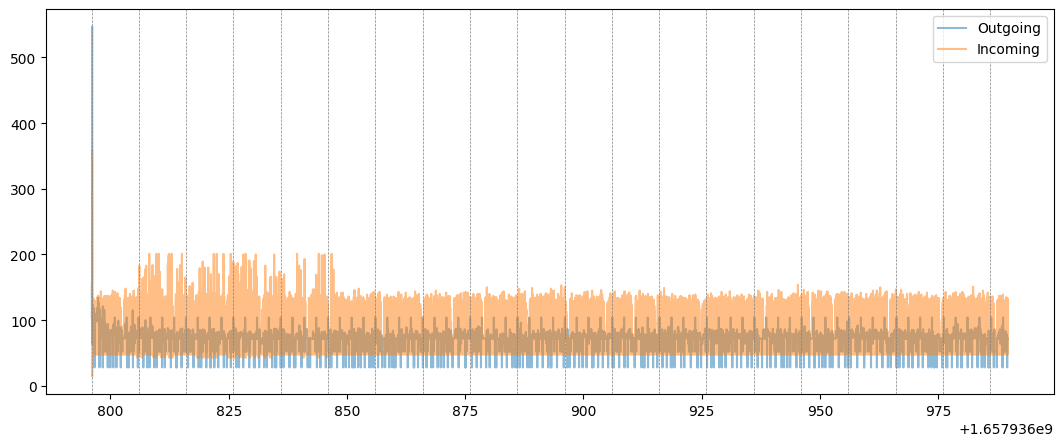

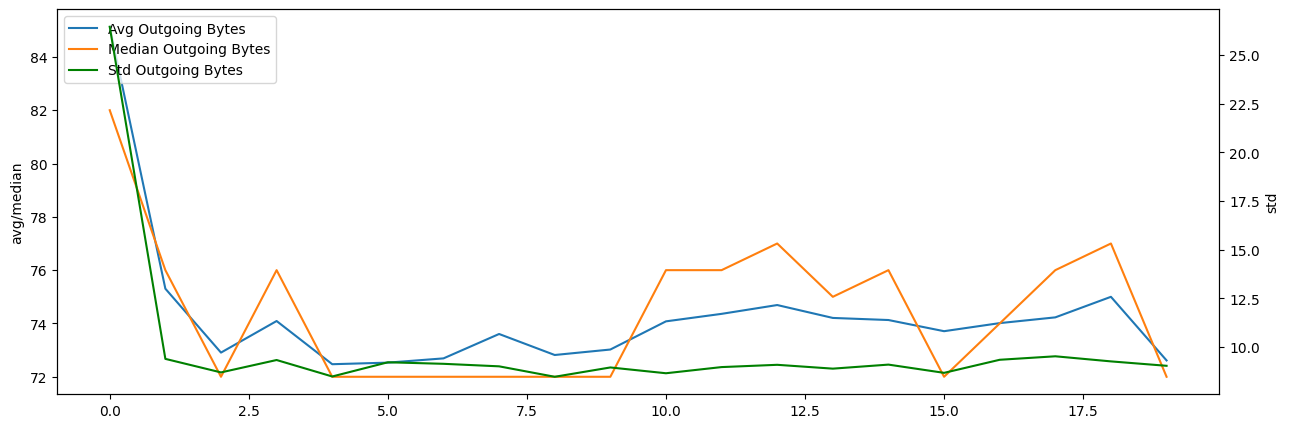

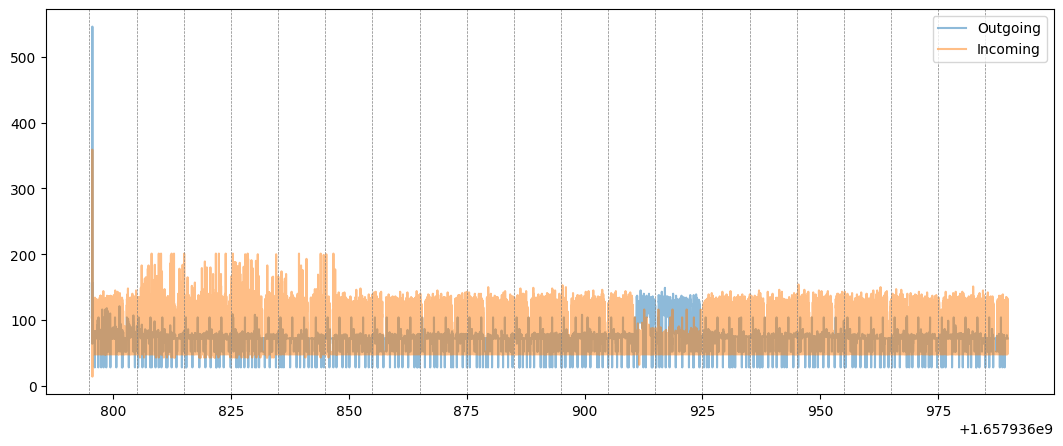

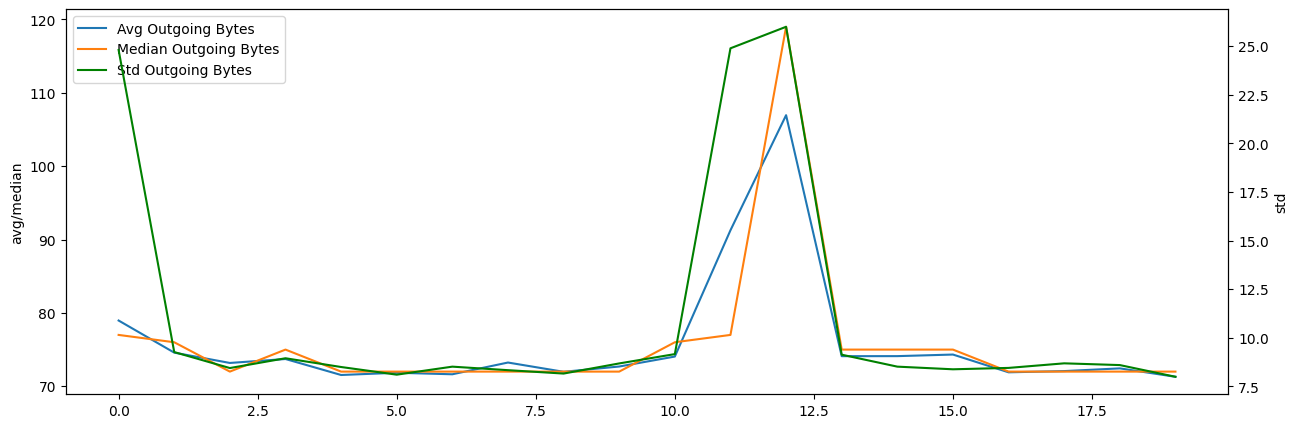

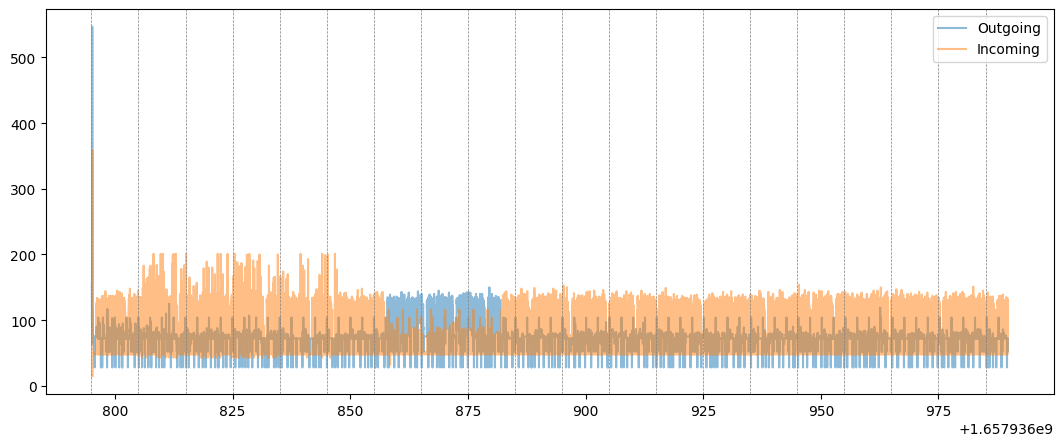

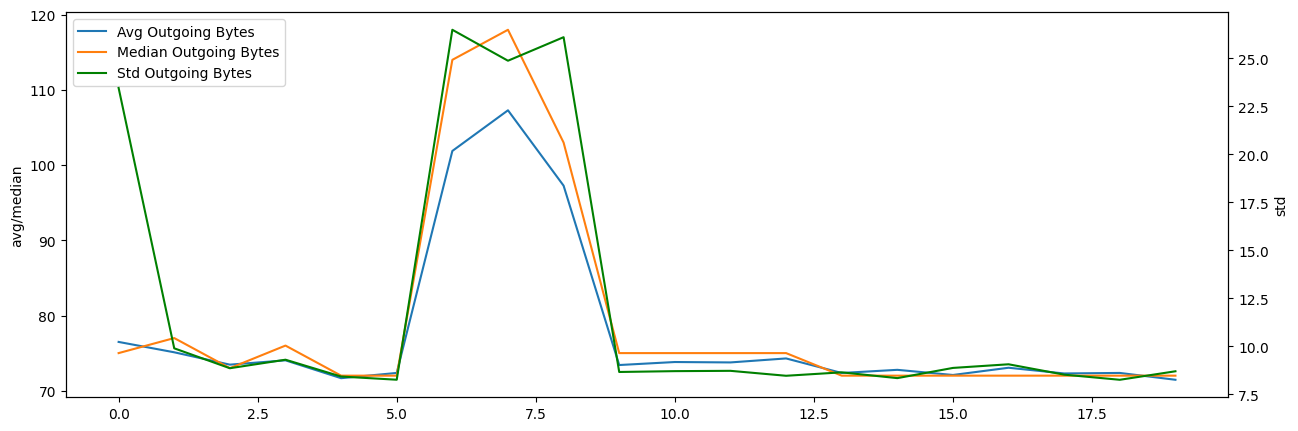

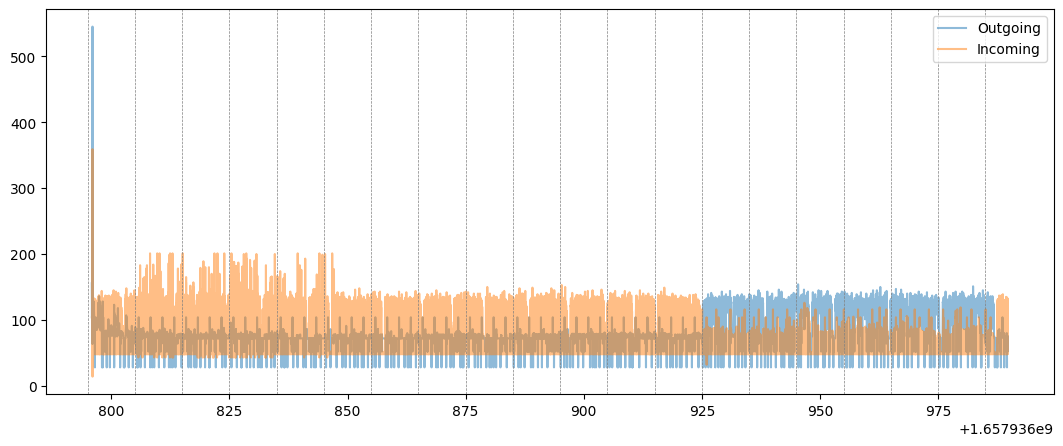

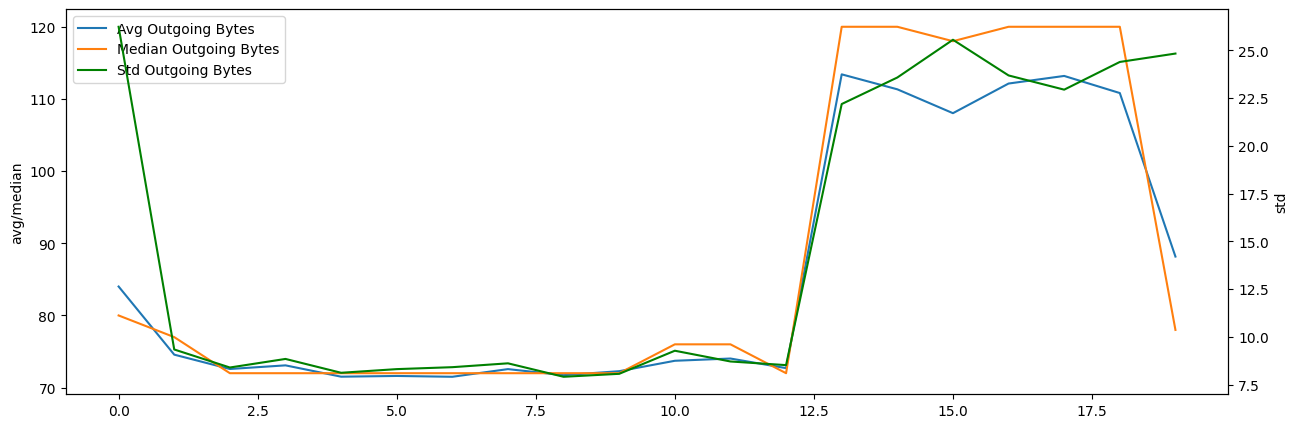

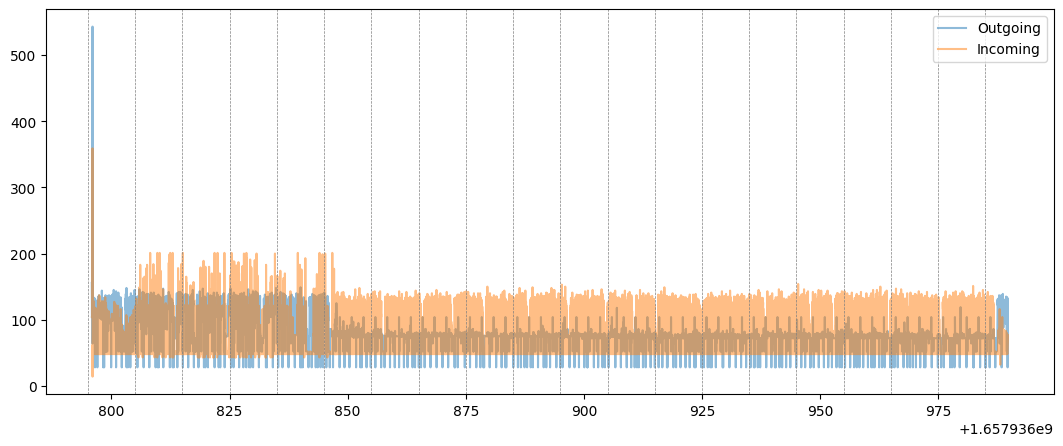

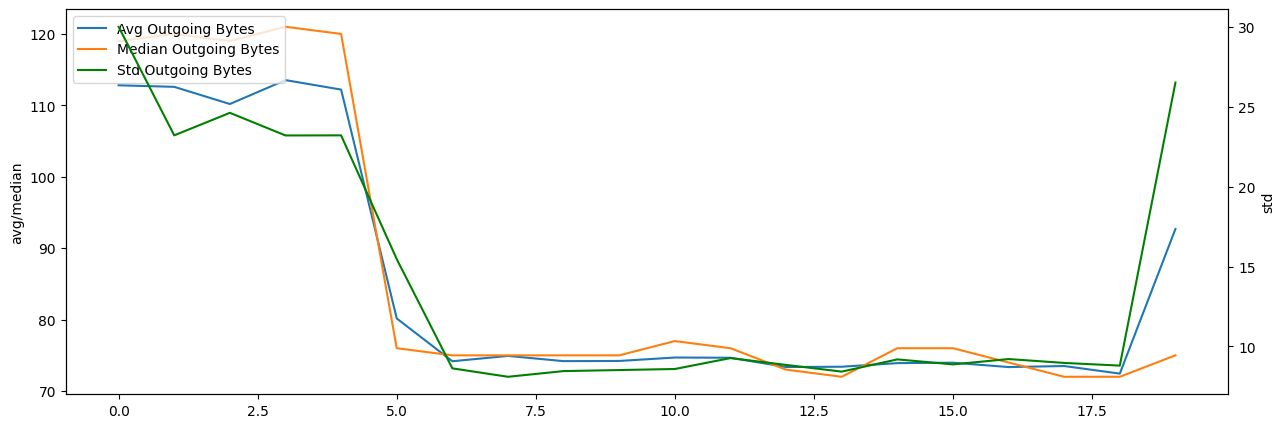

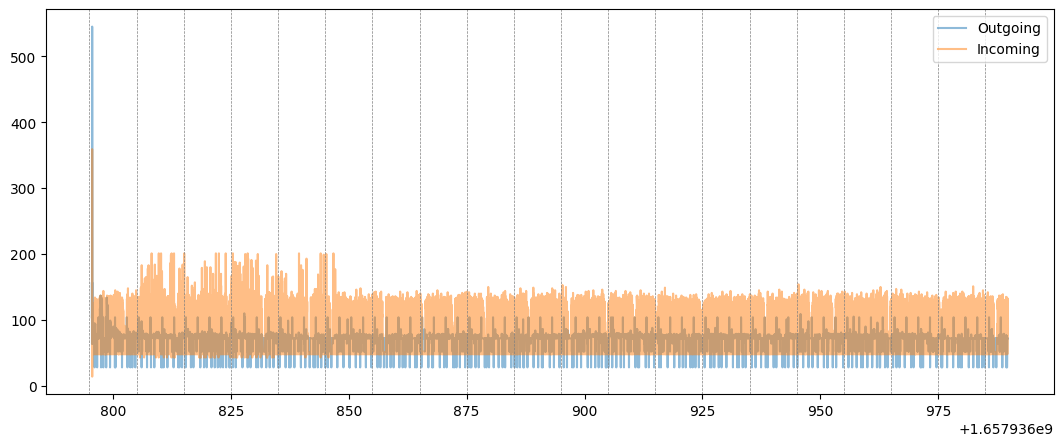

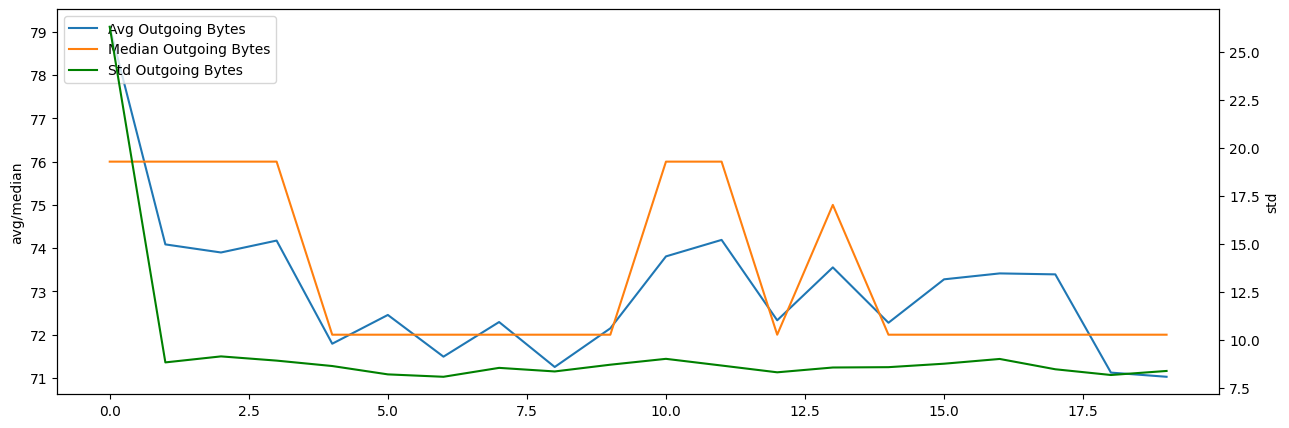

In [10]:
df_8_false = pd.read_csv('../data/csv_files/hdumb_8_false1.csv')

for i in range(8):
    df_8_false_out = df_8_false[df_8_false['src_ip'] == f'10.0.{i+1}.1']
    df_8_false_out = df_8_false_out.sort_values(by='timestamp')
    df_8_false_in = df_8_false[df_8_false['dst_ip'] == f'10.0.{i+1}.1']
    df_8_false_in = df_8_false_in.sort_values(by='timestamp')
    plt.figure(figsize=(13, 5))
    plt.plot(df_8_false_out['timestamp'], df_8_false_out['udp_payload_length'], alpha=0.5, label='Outgoing')
    plt.plot(df_8_false_in['timestamp'], df_8_false_in['udp_payload_length'], alpha=0.5, label='Incoming')

    # Add vertical lines every 10 seconds (bins)
    start_time = min(df_8_false_out['timestamp'].min(), df_8_false_in['timestamp'].min())
    end_time = max(df_8_false_out['timestamp'].max(), df_8_false_in['timestamp'].max())
    for t in range(int(start_time), int(end_time) + 1, 10):
        plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)
    
    plt.legend(fontsize='10')
    plt.show()

    df_filtered = df_8[df_8['IP'] == f'10.0.{i+1}.1']

    plt.figure(figsize=(15, 5))
    ax1 = plt.gca()  # Get current axis
    ax1.plot(df_filtered['bin_index'], df_filtered['average_outgoing_bytes'], label='Avg Outgoing Bytes')
    ax1.plot(df_filtered['bin_index'], df_filtered['median_outgoing_bytes'], label='Median Outgoing Bytes')
    ax1.set_ylabel('avg/median')
    
    # Create the second axis
    ax2 = ax1.twinx()
    ax2.plot(df_filtered['bin_index'], df_filtered['std_outgoing_bytes'], 'g', label='Std Outgoing Bytes')
    ax2.set_ylabel('std')
    
    # To make the plot easier to read, you might want to change the color of the tick labels to match the line color
    ax2.tick_params(axis='y')
    
    # Adding legends. The tricky part is combining the legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    plt.show()

The rule seems to hold for both 5 and 8 clients

## 3. Feature Selection

After labeling the data, we explore data to find suitable variables to construct Bayesian networks. In this section, we use the entire dataset and drop first bin as well as bins after 19 (for consistency).

In [11]:
def preprocess_data(data):
    """
    Process raw data from a dictionary to a formatted DataFrame.
    
    Parameters:
    - data (dict): A dictionary where the key is an IP address and the value is another dictionary
      of statistics indexed by bin number.

    Returns:
    - pd.DataFrame: A DataFrame with rows for each statistic, including IP and bin index, and
      columns reordered excluding the first and last bin index (drop bin number larger than 18 if there are more than 20 bins).
    """
    rows = []
    for ip, stats in data.items():
        for index, values in stats.items():
            # Exclude bins with index 0 or index > 18
            if index == 0 or index > 18:
                continue
            values['IP'] = ip
            values['bin_index'] = index
            rows.append(values)
    
    # Create the DataFrame
    df = pd.DataFrame(rows)

    # Reorder columns
    column_order = ['IP', 'bin_index'] + [col for col in df.columns if col not in ['IP', 'bin_index']]
    df = df[column_order]

    # Reset index after filtering
    df = df.reset_index(drop=True)
    
    return df


def load_and_preprocess(file_path):
    """
    Load data from a pickle file and preprocess it.
    
    Parameters:
    - file_path (str): The file path to the pickle file containing data processed by preprocessing_bins.py
    
    Returns:
    - pd.DataFrame: A preprocessed DataFrame ready for further analysis or processing.
    """
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return preprocess_data(data)

In [12]:
# List of file paths
file_paths_3 = [
    '../data/pickle_files/hdumb_3_false_bins1.pkl',
    '../data/pickle_files/hdumb_3_false_bins2.pkl',
    '../data/pickle_files/hdumb_3_false_bins3.pkl',
    '../data/pickle_files/hdumb_3_false_bins4.pkl',
    '../data/pickle_files/hdumb_3_false_bins5.pkl',
    '../data/pickle_files/hdumb_3_false_bins6.pkl'
]

# Load, preprocess, and collect all dataframes in a list
data_frames_3 = [load_and_preprocess(path) for path in file_paths_3]

# Concatenate all dataframes into one
df_combined_3 = pd.concat(data_frames_3)
df_combined_3.drop(['count_inter_arrival_incoming', 'count_inter_arrival_outgoing', 'sum_inter_arrival_incoming', 'sum_inter_arrival_outgoing'], axis=1, inplace=True)
df_combined_3.head()

IP  bin_index  total_bytes_incoming  total_bytes_outgoing  \
0  10.0.1.1          1                 86779                 39866   
1  10.0.1.1          2                 79904                 39474   
2  10.0.1.1          3                 70648                 38976   
3  10.0.1.1          4                 40509                 51054   
4  10.0.1.1          5                 22666                 58063   

   incoming_packets  outgoing_packets  average_incoming_bytes  \
0               943               532               92.024390   
1               834               529               95.808153   
2               704               535              100.352273   
3               457               531               88.641138   
4               325               533               69.741538   

   std_incoming_bytes  median_incoming_bytes  packet_frequency_incoming  \
0           26.879112                   79.0                       94.3   
1           28.227835                   99.0                       83.4   
2           29.309275                  113.0                       70.4   
3           30.115973                   82.0                       45.7   
4           16.718649                   77.0                       32.5   

   average_inter_arrival_incoming  average_outgoing_bytes  std_outgoing_bytes  \
0                        0.010603               74.936090            8.767538   
1                        0.011989               74.620038            8.419250   
2                        0.014210               72.852336           21.458231   
3                        0.021863               96.146893           26.736822   
4                        0.030794              108.936210           25.429980   

   median_outgoing_bytes  packet_frequency_outgoing  \
0                   75.0                       53.2   
1                   76.0                       52.9   
2                   72.0                       53.5   
3                   86.0                       53.1   
4                  119.0                       53.3   

   average_inter_arrival_outgoing  
0                        0.018821  
1                        0.018876  
2                        0.018713  
3                        0.018835  
4                        0.018746

In [13]:
# List of file paths
file_paths_5 = [
    '../data/pickle_files/hdumb_5_false_bins1.pkl',
    '../data/pickle_files/hdumb_5_false_bins2.pkl',
    '../data/pickle_files/hdumb_5_false_bins3.pkl',
    '../data/pickle_files/hdumb_5_false_bins4.pkl',
    '../data/pickle_files/hdumb_5_false_bins5.pkl',
    '../data/pickle_files/hdumb_5_false_bins6.pkl'
]

# Load, preprocess, and collect all dataframes in a list
data_frames_5 = [load_and_preprocess(path) for path in file_paths_5]

# Concatenate all dataframes into one
df_combined_5 = pd.concat(data_frames_5)
df_combined_5.drop(['count_inter_arrival_incoming', 'count_inter_arrival_outgoing', 'sum_inter_arrival_incoming', 'sum_inter_arrival_outgoing'], axis=1, inplace=True)
df_combined_5.head()

IP  bin_index  total_bytes_incoming  total_bytes_outgoing  \
0  10.0.1.1          1                109030                 59281   
1  10.0.1.1          2                118455                 60858   
2  10.0.1.1          3                 66670                 58393   
3  10.0.1.1          4                 58059                 59886   
4  10.0.1.1          5                 37106                 58945   

   incoming_packets  outgoing_packets  average_incoming_bytes  \
0              1286               537               84.782271   
1              1390               537               85.219424   
2               820               534               81.304878   
3               733               534               79.207367   
4               483               537               76.824017   

   std_incoming_bytes  median_incoming_bytes  packet_frequency_incoming  \
0           23.187361                   77.0                      128.6   
1           22.716776                   77.0                      139.0   
2           23.526925                   77.0                       82.0   
3           22.316602                   77.0                       73.3   
4           23.861636                   77.0                       48.3   

   average_inter_arrival_incoming  average_outgoing_bytes  std_outgoing_bytes  \
0                        0.007751              110.392924           24.108124   
1                        0.007202              113.329609           22.653649   
2                        0.012220              109.350187           24.522055   
3                        0.013623              112.146067           22.543958   
4                        0.020716              109.767225           25.218075   

   median_outgoing_bytes  packet_frequency_outgoing  \
0                  119.0                       53.7   
1                  121.0                       53.7   
2                  118.0                       53.4   
3                  120.0                       53.4   
4                  119.0                       53.7   

   average_inter_arrival_outgoing  
0                        0.018618  
1                        0.018620  
2                        0.018722  
3                        0.018719  
4                        0.018633

In [14]:
# List of file paths
file_paths_8 = [
    '../data/pickle_files/hdumb_8_false_bins1.pkl',
    '../data/pickle_files/hdumb_8_false_bins2.pkl',
    '../data/pickle_files/hdumb_8_false_bins3.pkl'
]

# Load, preprocess, and collect all dataframes in a list
data_frames_8 = [load_and_preprocess(path) for path in file_paths_8]

# Concatenate all dataframes into one
df_combined_8 = pd.concat(data_frames_8)
df_combined_8.drop(['count_inter_arrival_incoming', 'count_inter_arrival_outgoing', 'sum_inter_arrival_incoming', 'sum_inter_arrival_outgoing'], axis=1, inplace=True)
df_combined_8.head()

IP  bin_index  total_bytes_incoming  total_bytes_outgoing  \
0  10.0.1.1          1                248011                 40339   
1  10.0.1.1          2                176902                 39041   
2  10.0.1.1          3                191286                 39524   
3  10.0.1.1          4                101134                 38918   
4  10.0.1.1          5                114291                 38670   

   incoming_packets  outgoing_packets  average_incoming_bytes  \
0              2782               544               89.148454   
1              1902               540               93.008412   
2              2120               540               90.229245   
3              1033               547               97.903195   
4              1264               540               90.420095   

   std_incoming_bytes  median_incoming_bytes  packet_frequency_incoming  \
0           23.370934                   78.0                      278.2   
1           25.808850                   78.0                      190.2   
2           25.566600                   77.0                      212.0   
3           29.143329                  105.0                      103.3   
4           24.856005                   79.0                      126.4   

   average_inter_arrival_incoming  average_outgoing_bytes  std_outgoing_bytes  \
0                        0.003595               74.152574            8.908408   
1                        0.005256               72.298148            8.252621   
2                        0.004719               73.192593            8.710769   
3                        0.009663               71.148080            8.890976   
4                        0.007914               71.611111            8.234316   

   median_outgoing_bytes  packet_frequency_outgoing  \
0                   76.0                       54.4   
1                   72.0                       54.0   
2                   72.0                       54.0   
3                   72.0                       54.7   
4                   72.0                       54.0   

   average_inter_arrival_outgoing  
0                        0.018410  
1                        0.018523  
2                        0.018505  
3                        0.018269  
4                        0.018511

### Label Data

In [15]:
df_combined_3['is_speaking'] = 0
df_combined_3.loc[df_combined_3['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1

df_combined_5['is_speaking'] = 0
df_combined_5.loc[df_combined_5['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1

df_combined_8['is_speaking'] = 0
df_combined_8.loc[df_combined_8['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1

In [16]:
# sns.pairplot(df_combined_3.drop(['IP', 'bin_index'], axis=1), hue='is_speaking')
# plt.show()

### Distributions

#### Client 3

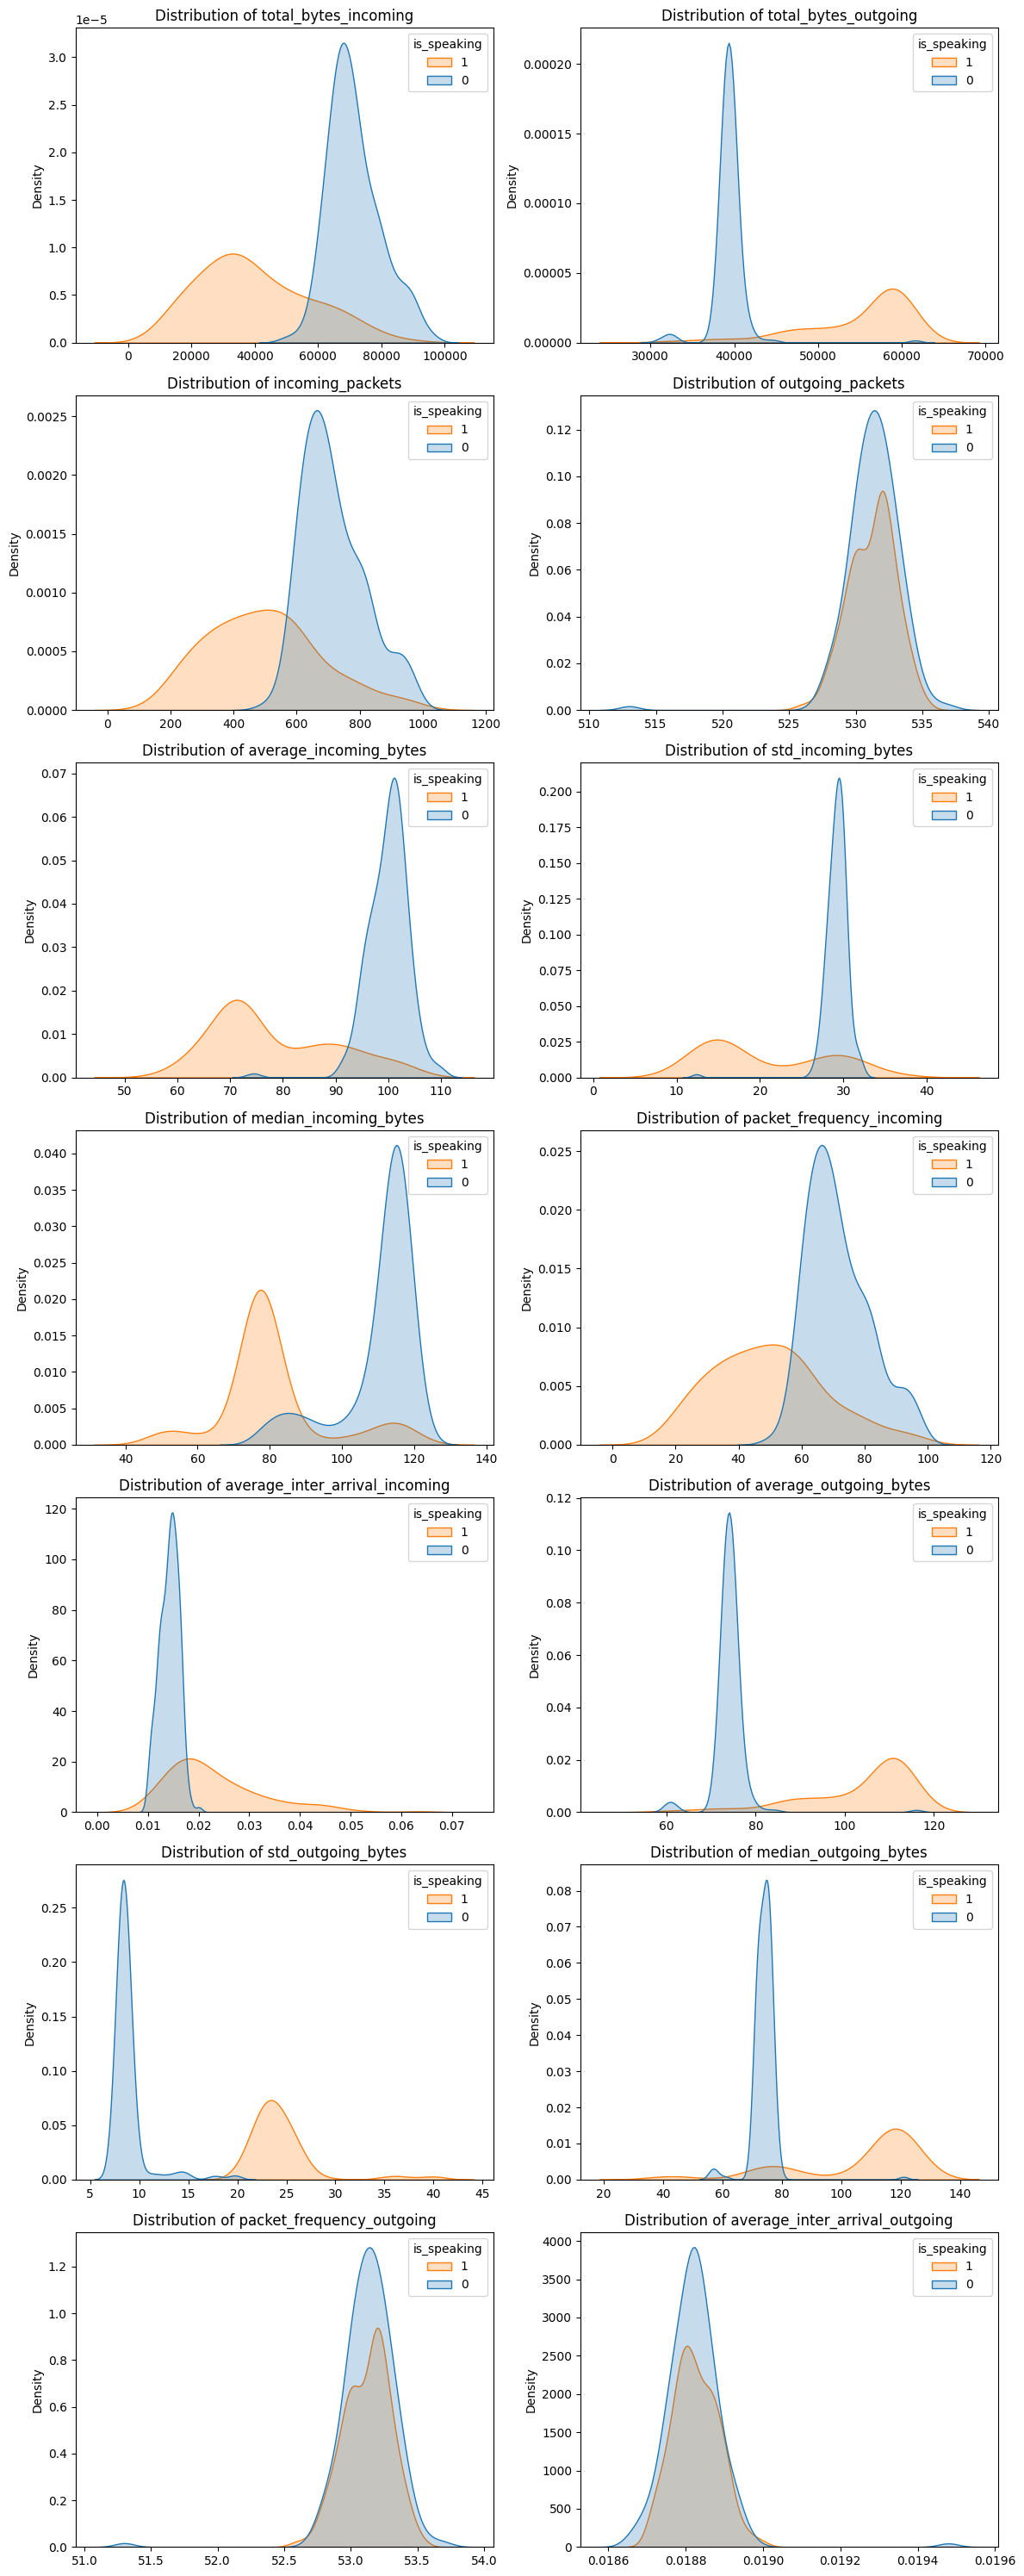

In [17]:
ncols = 2
nrows = (len(df_combined_3.drop(['IP', 'bin_index'], axis=1).columns) - 1 + ncols - 1) // ncols  # '-1' for the label column

plt.figure(figsize=(12, 30))  

for i, col in enumerate(df_combined_3.drop(['IP', 'bin_index', 'is_speaking'], axis=1).select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i+1)
    sns.kdeplot(data=df_combined_3.drop(['IP', 'bin_index'], axis=1), x=col, hue='is_speaking', fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.legend(title='is_speaking', labels=[1, 0])

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

#### Client 5

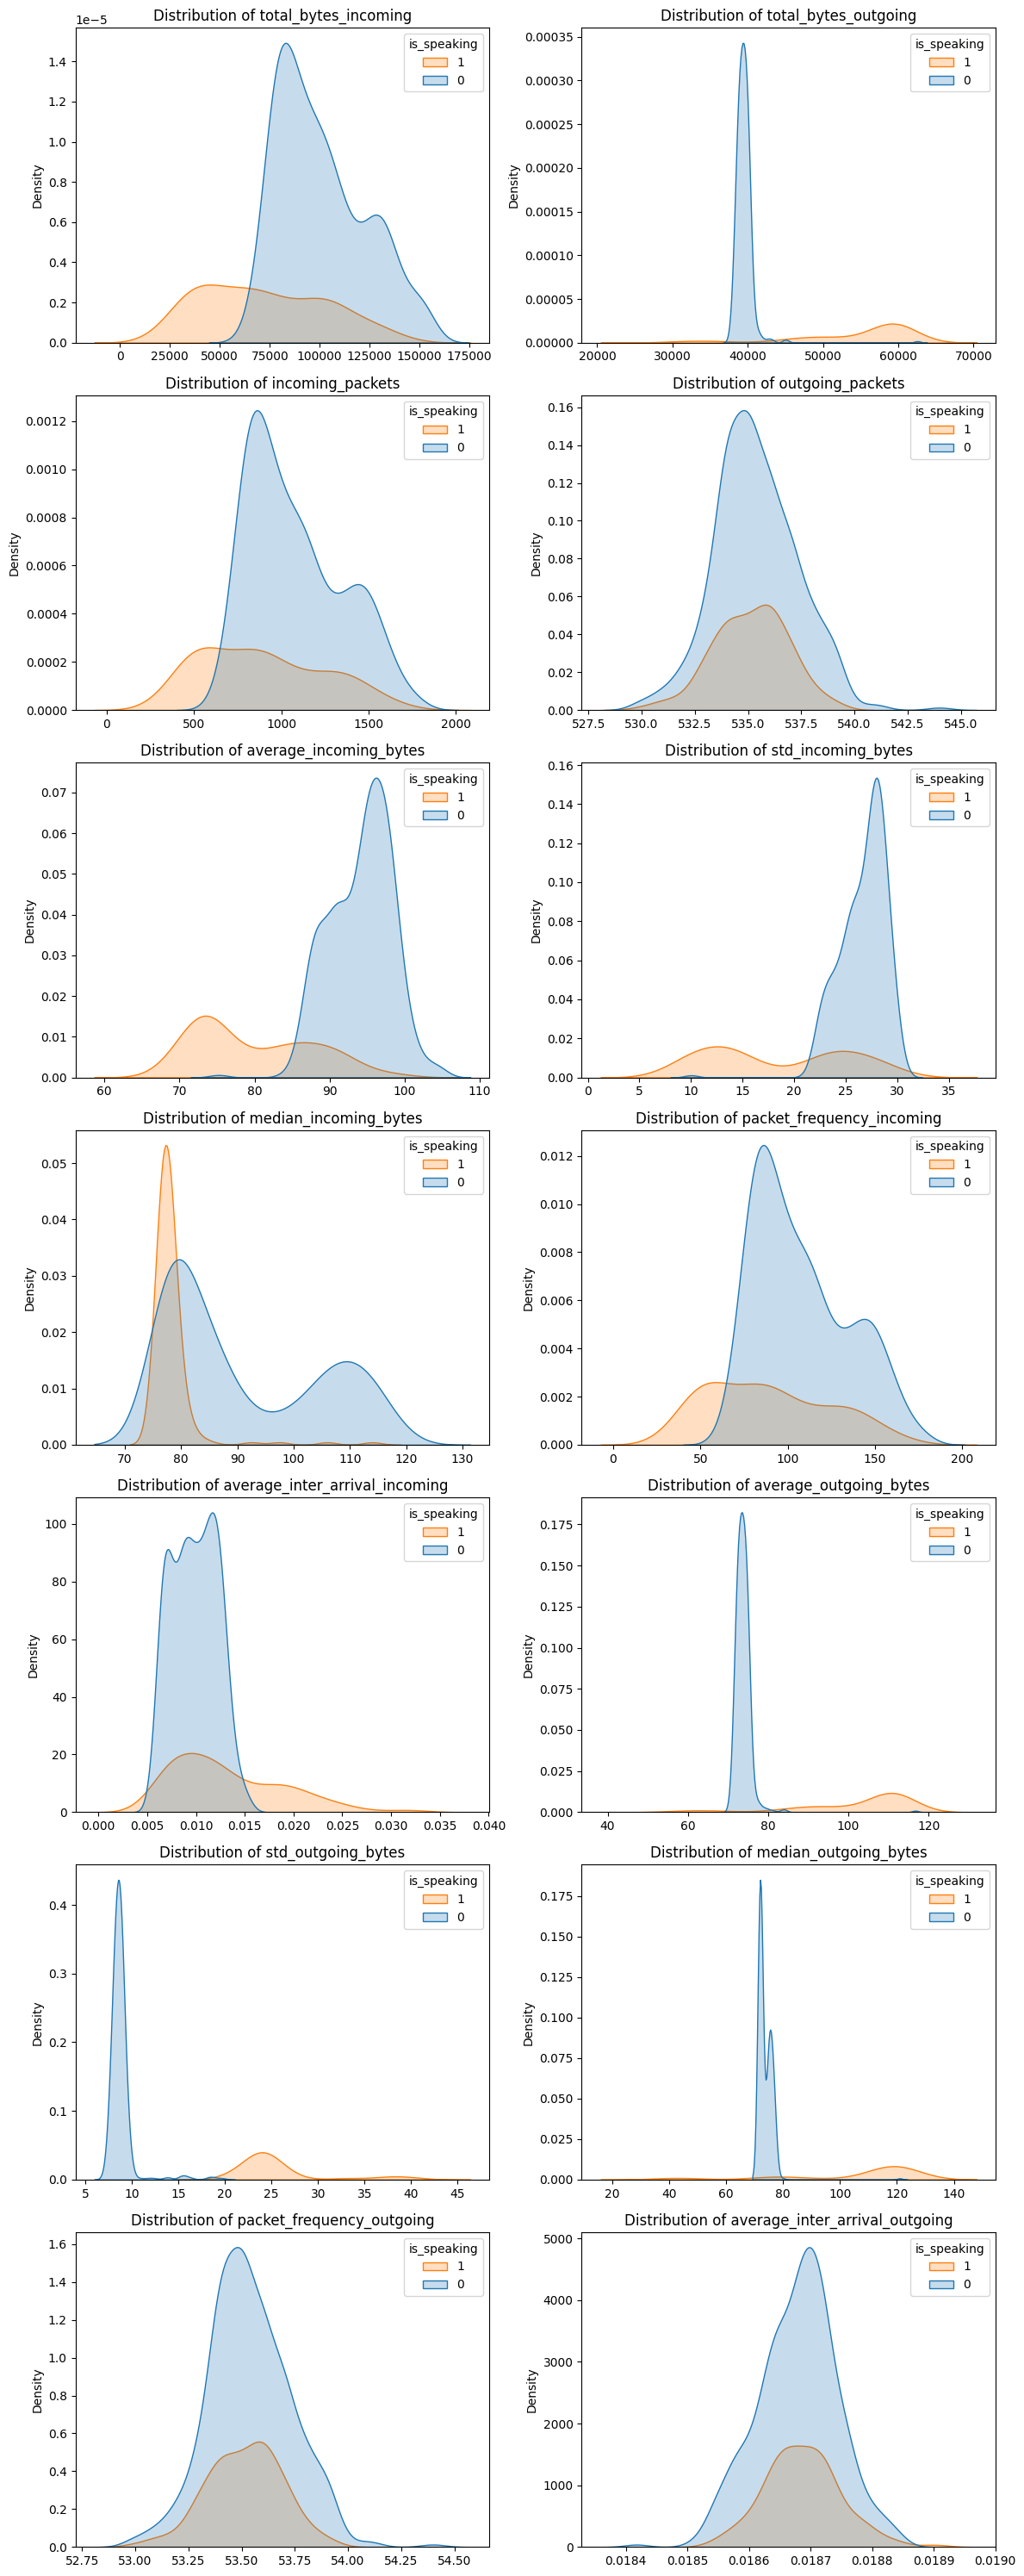

In [18]:
ncols = 2
nrows = (len(df_combined_5.drop(['IP', 'bin_index'], axis=1).columns) - 1 + ncols - 1) // ncols  # '-1' for the label column

plt.figure(figsize=(12, 30))  

for i, col in enumerate(df_combined_5.drop(['IP', 'bin_index', 'is_speaking'], axis=1).select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i+1)
    sns.kdeplot(data=df_combined_5.drop(['IP', 'bin_index'], axis=1), x=col, hue='is_speaking', fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.legend(title='is_speaking', labels=[1, 0])

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

#### Client 8

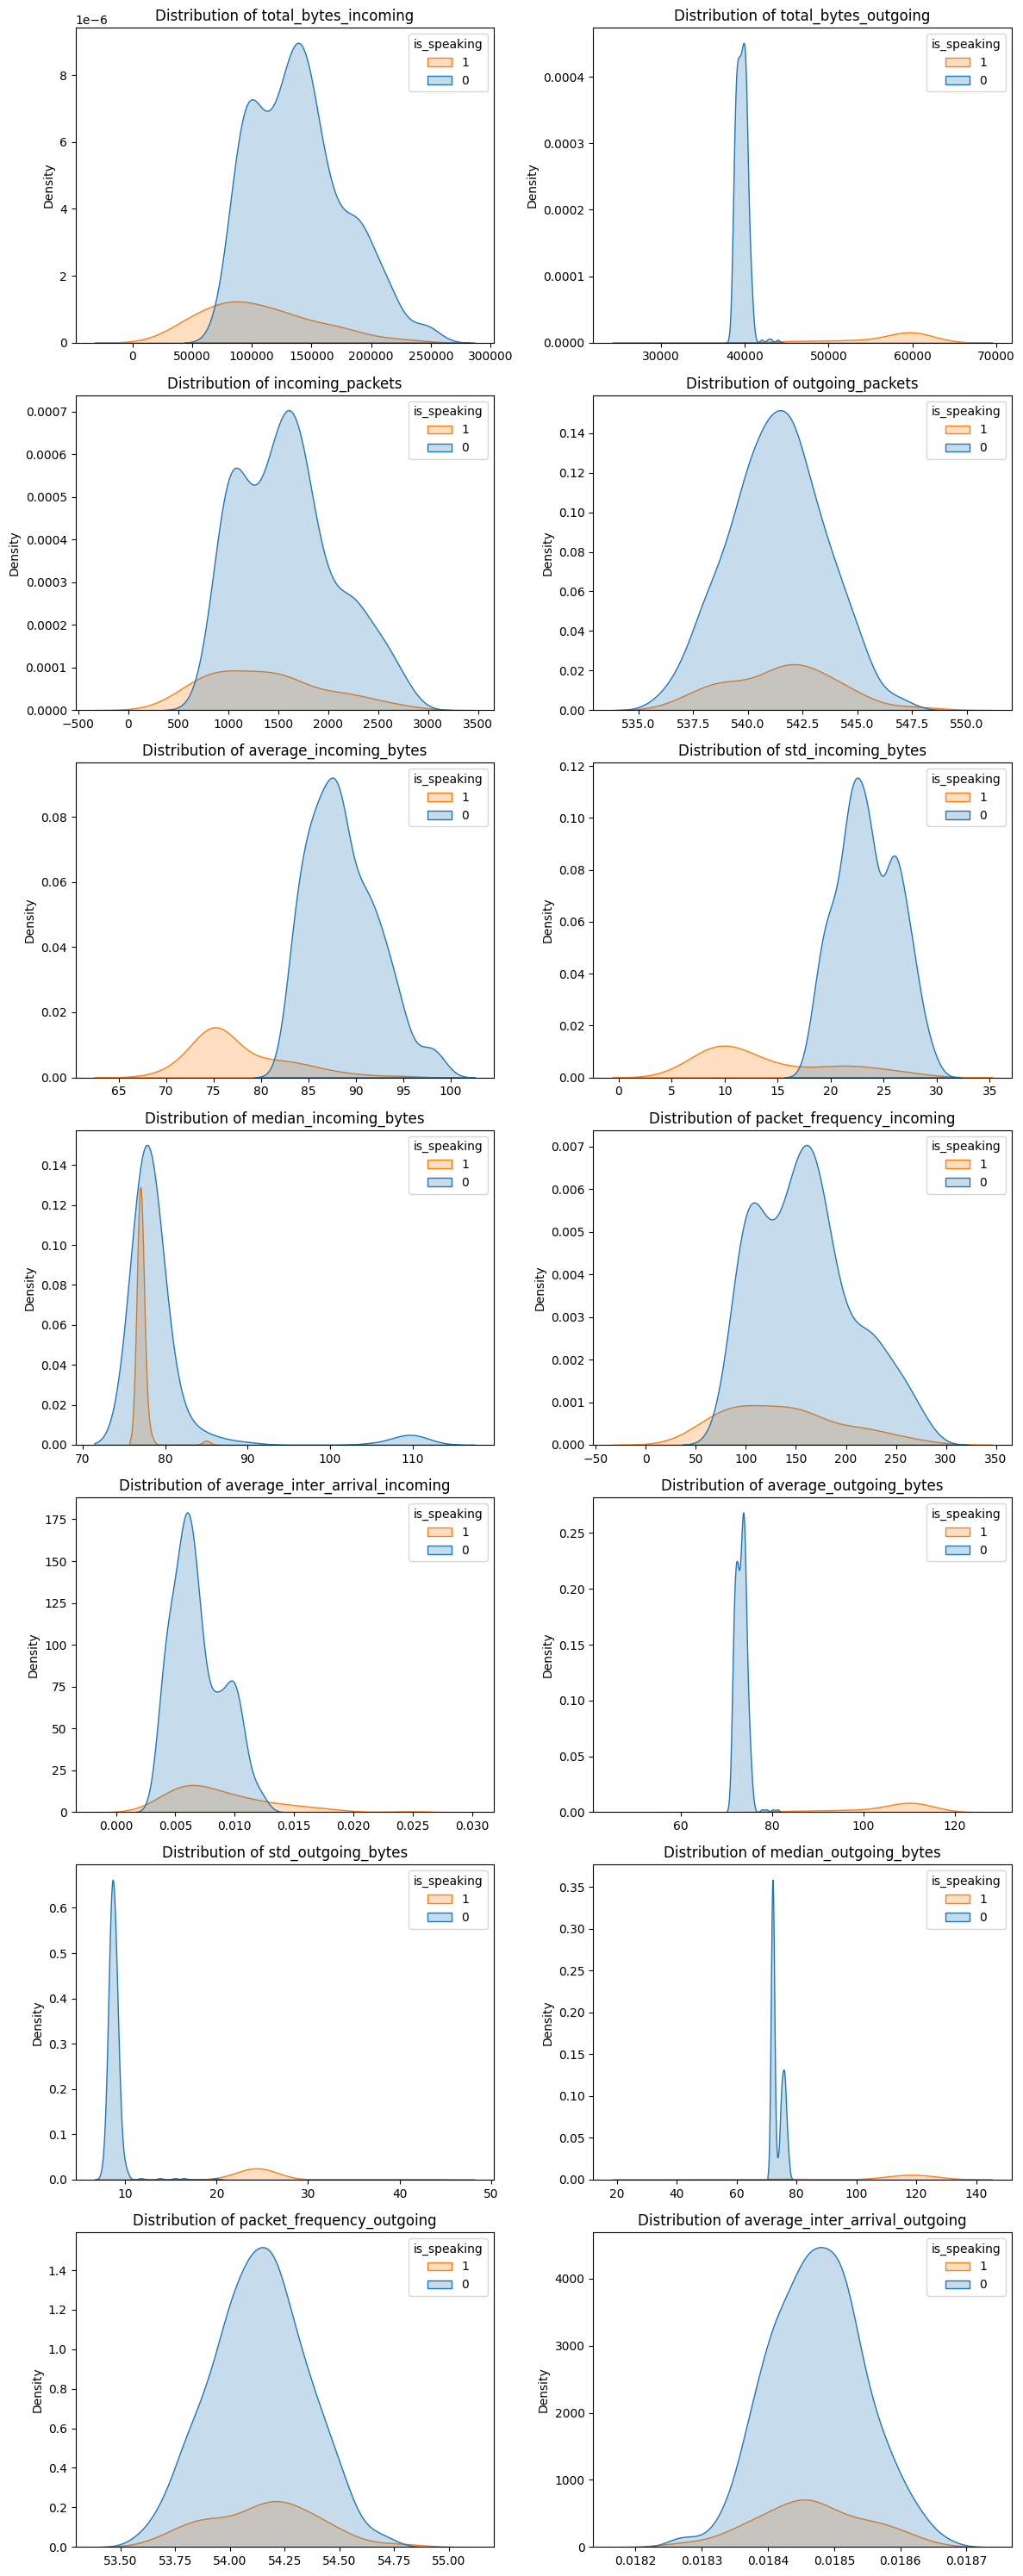

In [19]:
ncols = 2
nrows = (len(df_combined_8.drop(['IP', 'bin_index'], axis=1).columns) - 1 + ncols - 1) // ncols  # '-1' for the label column

plt.figure(figsize=(12, 30))  

for i, col in enumerate(df_combined_8.drop(['IP', 'bin_index', 'is_speaking'], axis=1).select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i+1)
    sns.kdeplot(data=df_combined_8.drop(['IP', 'bin_index'], axis=1), x=col, hue='is_speaking', fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.legend(title='is_speaking', labels=[1, 0])

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

### Boxplots

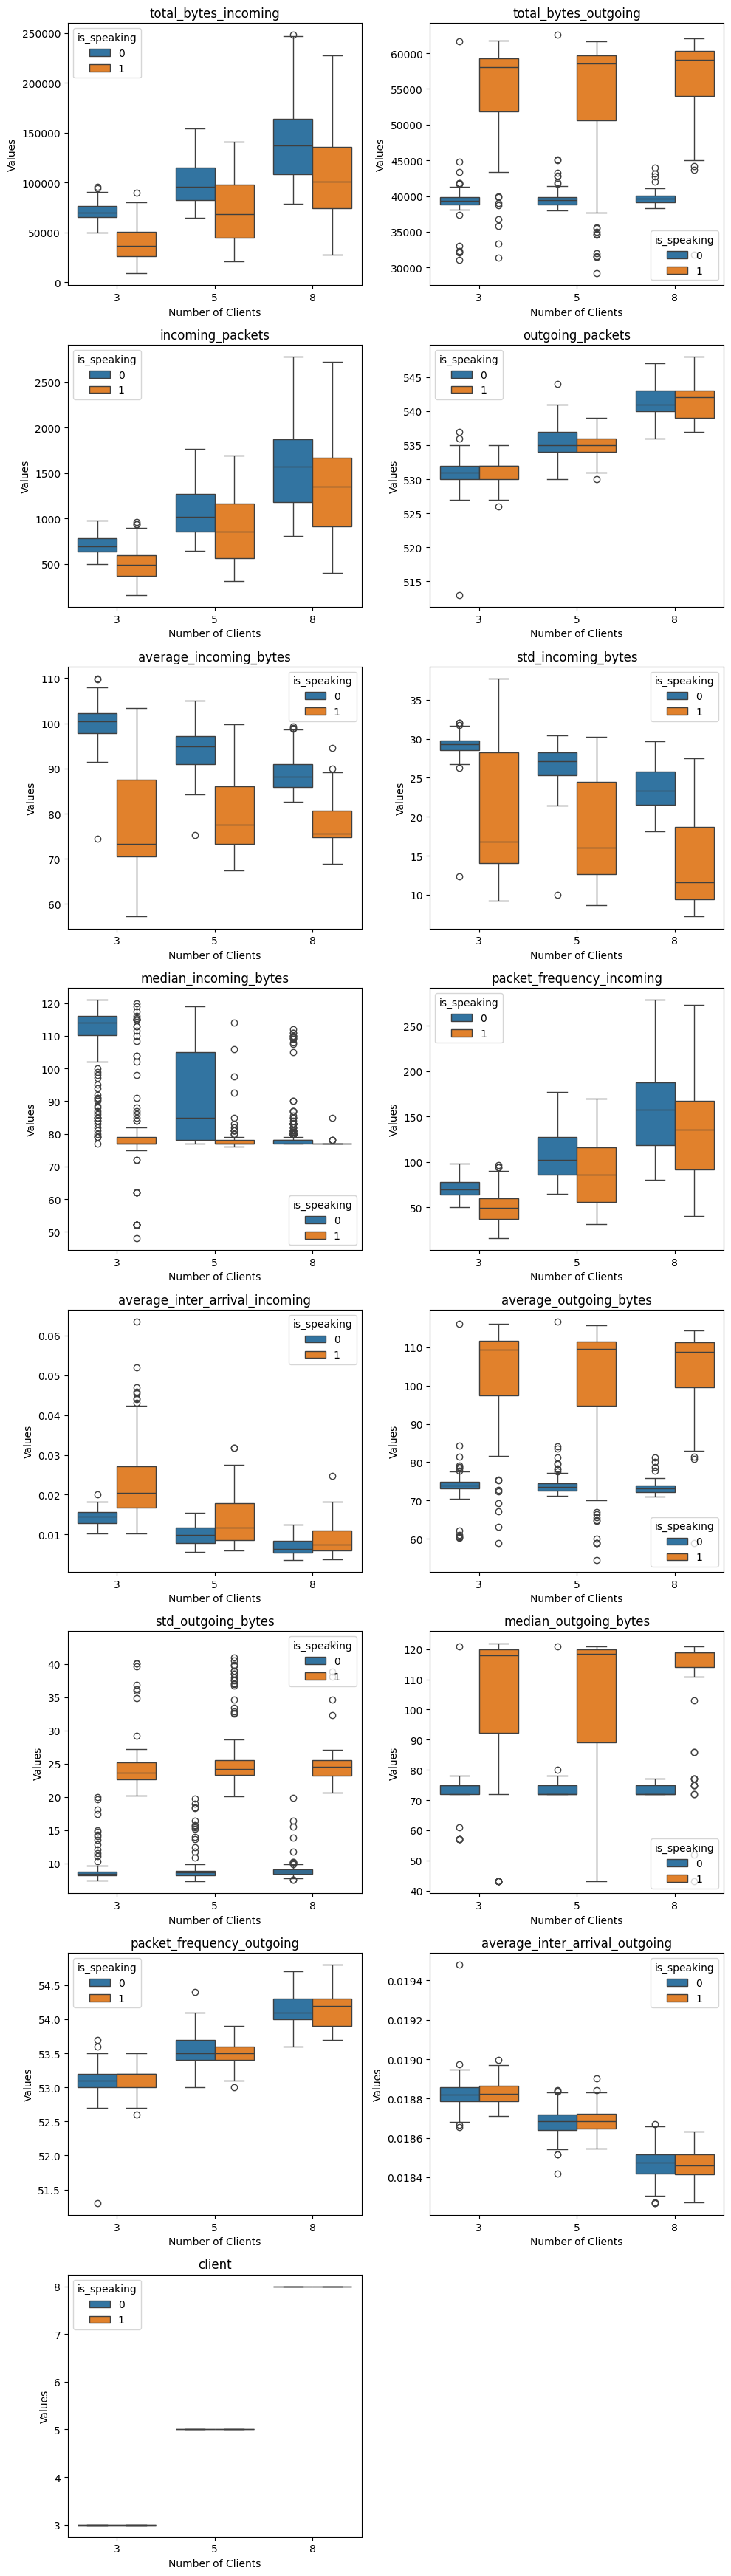

In [20]:
# Create a figure and axis
df_combined_3['client'] = 3
df_combined_5['client'] = 5
df_combined_8['client'] = 8

df_combined = pd.concat([df_combined_3, df_combined_5, df_combined_8])

plt.figure(figsize=(10, 35))  
ncols = 2
nrows = (len(df_combined.drop(['IP', 'bin_index'], axis=1).columns) - 1 + ncols - 1) // ncols

for i, col in enumerate(df_combined.drop(['IP', 'bin_index', 'is_speaking'], axis=1).select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(data=df_combined, x='client', y=col, hue='is_speaking')
    plt.title(col)
    plt.ylabel('Values')
    plt.xlabel('Number of Clients')

plt.tight_layout() 
plt.show()

**Observations**
- Variables distinguishable
  - total_bytes_incoming
  - total_bytes_outgoing
  - incoming_packets
  - average_incoming_packets
  - std_incoming_packets
  - average_outgoing_bytes
  - median_outgoin_bytes
- Other variables does not seem to vary depending on `is_speaking`

In [25]:
# Save figures
df_combined_3['client'] = 3
df_combined_5['client'] = 5
df_combined_8['client'] = 8

df_combined = pd.concat([df_combined_3, df_combined_5, df_combined_8])

# plt.figure(figsize=(10, 35))  
# ncols = 2
# nrows = (len(df_combined.drop(['IP', 'bin_index'], axis=1).columns) - 1 + ncols - 1) // ncols

for i, col in enumerate(df_combined.drop(['IP', 'bin_index', 'is_speaking'], axis=1).select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df_combined, x='client', y=col, hue='is_speaking')
    # plt.title(col)
    plt.ylabel('Values')
    plt.xlabel('Number of Clients')
    plt.savefig(f'{col}.png')
    plt.close()